<a href="https://colab.research.google.com/github/LALITH23SUNDARAM/Bike-Sharing-Demand-Prediction/blob/main/Lalith_Bike_Sharing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


Bike sharing system is one of emerging business in south korea. Countrys famous messenger app kakao T, Deploy their idea as pilot in Seoul. Here public can rent Electric bikes or Traditional for short time period in rental basis. Here individual can rent bike from their nearby Dock and return it back to another Dock belongs to the same system.

The main motto of this business to reduce movement of cars and resolve traffic problems.

Every bike sharing company wants to face three main Hurdles in their Businnes, They are



1.   Vandalisim
2.   Savage Parking

3.   No of bikes should have to hold for Seamless Service

Today we are going to jump over an third obstacle by creating an model that predicts How many bikes should company Kakao wants to hold for providing seamless service between the users.

To make an prediction about feature, we have to know about Past. Past gives us Information, how the things happend thus far. By understanding those information one able to act accordingly during similar kind suitation that repets in future.

They same way predictive model learns the informtion through Data. And learns the underlying pattern, and relation between Predictor and response variable.

Since here we have to know about bike counts. Its clears this is the Regression task. Because Bike counts holds continous data points.

Informtion - we are given set of data which conatins different features that directly/Indirectly relates to number of bike rented by users in seoul.

Our data set has past history of response variable. Its clears we are going performs Supervised Regression task.





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [ ]:
filepath = '/content/drive/MyDrive/capstone 2/Copy of SeoulBikeData.csv'
seoul_df = pd.read_csv(filepath, encoding= 'unicode_escape')

In [ ]:
seoul_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
seoul_df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [ ]:
seoul_df.tail()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
8755  30/11/2018               1003    19  ...   Autumn  No Holiday              Yes
8756  30/11/2018                764    20  ...   Autumn  No Holiday              Yes
8757  30/11/2018                694    21  ...   Autumn  No Holiday              Yes
8758  30/11/2018                712    22  ...   Autumn  No Holiday              Yes
8759  30/11/2018                584    23  ...   Autumn  No Holiday              Yes

[5 rows x 14 columns]

**Shape:**

In [ ]:
seoul_df.shape

(8760, 14)

Here we are having long dataset of 8760 observation with respect to Days and 13 Independent features & 01 Dependent feature 

**Data Information:**

In [ ]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number **of** bikes rented per hour and date information.</b>

### <b>Attribute Information: </b>

* ### **Date** : year-month-day (Our Observations recorded between 1/12/2017 to 30/11/2018)
* ### **Rented Bike count **- Count of bikes rented at each hour**(Target variable)**
* ### **Hour** - Hour of the bike rented by users.
* ### **Temperature(Celsius)**- People prefers to travel under the roof during sunny  day. My hypothesis is count of bikes rent will low on those days.

* ### **Humidity(%)/Relative Humidity** - Humidity is the presence of water vapor in the atmosphere. The more water evaporates in a given area, the more water vapor rises into the air, and the higher the humidity of that area is. Hot places tend to be more humid than cool places because heat causes water to evaporate faster.
Therefore users not prefer lower humid days.

* ### **Windspeed(m/s)** - Wind speed is the major feature that affects transportation business such as Aviation, Maritime, Construction Industries. It not left our bike sharing service too. More people not prefer to ride a bike, its difficult. so higher the windspeed lower the bike rent count.

* ### **Visibility(10m)** - Degree of clearness, dark coloured object can be seen on the horizon against the sky. Lower visibility its hard to ride bikes.
* ### ***Dew point temperature(Celsius)** - Higher the dew point temprature, greater the amount moisture hold in a air.

* ### **Solar radiation(MJ/m2)** - Energy emitted by the sun per unit area, Higher the solar radiation lower the people prefrence to ride.

* ### **Rainfall(mm)** - Every square metre receives 1 litre of rain water,Mostly people will not ride bikes under rainfall and snowfall.

* ### **Snowfall (cm)** - 1 centimetre of snow is equivalent to about 1 millimetre of water once the snow is melted. Higher the snowfall cm lower the bikes rented rate.

* ### **Seasons** - Natural phenomenon, Seasonality is a characteristic of a time series, every product fluctuates in sales with routine calender year.

* ### **Holiday** - Holiday/No holiday. Here it denotes Public holidays, National Important days were Colleges, corporate office which not functioning.

* ### **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours) This feature explains days when service provider functioned and not functioned. 

**Five Points Data Summary.**

---




In [ ]:
seoul_df.describe([0.01,0.1,.25, .5, .75,.99])

Rented Bike Count         Hour  ...  Rainfall(mm)  Snowfall (cm)
count        8760.000000  8760.000000  ...   8760.000000    8760.000000
mean          704.602055    11.500000  ...      0.148687       0.075068
std           644.997468     6.922582  ...      1.128193       0.436746
min             0.000000     0.000000  ...      0.000000       0.000000
1%              0.000000     0.000000  ...      0.000000       0.000000
10%            64.000000     2.000000  ...      0.000000       0.000000
25%           191.000000     5.750000  ...      0.000000       0.000000
50%           504.500000    11.500000  ...      0.000000       0.000000
75%          1065.250000    17.250000  ...      0.000000       0.000000
99%          2526.230000    23.000000  ...      4.000000       2.500000
max          3556.000000    23.000000  ...     35.000000       8.800000

[11 rows x 10 columns]

Here we can notice some features like Humidity, Visibility are having huge drop immediate after 1 percentile to minimum. And other features like Rainfall & Snowfall has huge jump after 99 percentile to maximum value.

**Missing values:**

---



In [ ]:
seoul_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
pip install missingno


In [ ]:
import missingno as msno

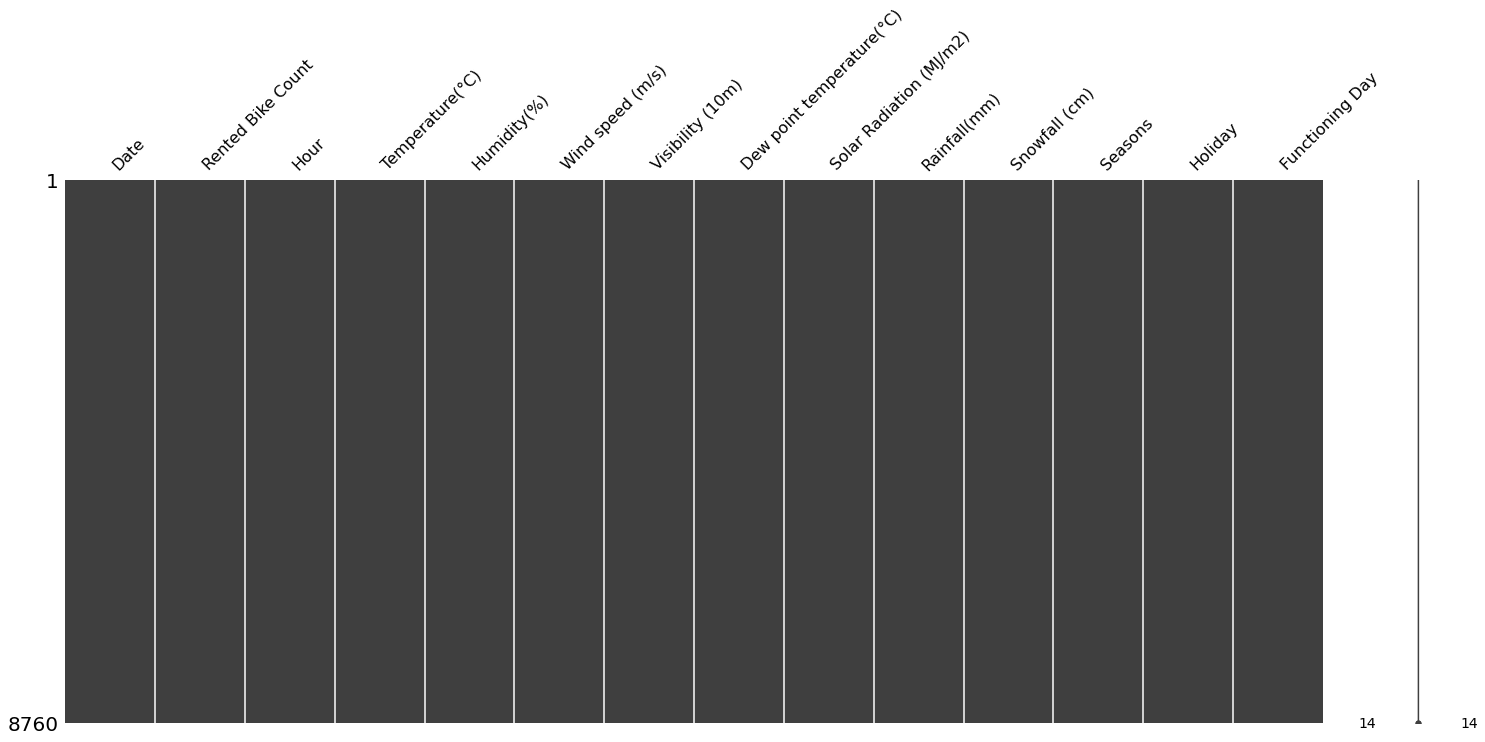

In [ ]:
# heat matrix for missing values
fig = msno.matrix(seoul_df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

Heat matrix comprises two denotions black and white, white represents missing values in respective features. And there is sparl line right over the chart, its fluctuates when the presence of missing values.

As our plot has no white lines and no fluctuation in spark line it shows there is no missing values in our dataset. It shows service provider has keen tracking of their business information, its an good sign for our analysis.

**Date:**

Lets quikly delve into data exploration. Date column has stored as string, date is valuable information its shows how the trend been on varying among days. To  extract information from Date we have to change the datatype from string to Datetime stamp.


In [ ]:
# using datetime function
seoul_df['date'] = pd.to_datetime(seoul_df.Date)

In [ ]:
seoul_df.head()

Date  Rented Bike Count  Hour  ...     Holiday  Functioning Day       date
0  01/12/2017                254     0  ...  No Holiday              Yes 2017-01-12
1  01/12/2017                204     1  ...  No Holiday              Yes 2017-01-12
2  01/12/2017                173     2  ...  No Holiday              Yes 2017-01-12
3  01/12/2017                107     3  ...  No Holiday              Yes 2017-01-12
4  01/12/2017                 78     4  ...  No Holiday              Yes 2017-01-12

[5 rows x 15 columns]

In [ ]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   object        
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

**Duplicated Values:**

Presence of duplicate, incase there some observation seldom in our dataset, it results low testing error this is due to our model learns datapoints that occurs repeatedly and assumes some generalised pattern between datapoints instead capturing true estimators between data. Its good to drop/Handle those duplicated values before feeds data to the model.

In [ ]:
seoul_df.duplicated().sum()

0

Fortunatly, our dataset not having repeated datapoints.

**Feature Creation:**

Date stamp as stored as string in our dataset here we have to change the date into integer then we can do exploration. Our path here initially created three distinct feature like year, month and weekday.

From that we can visualize how the bike engagement varies between years, months and during weekdays.

In [ ]:
seoul_df['Year'] = seoul_df.date.dt.year
seoul_df['Month']  = seoul_df.date.dt.month
seoul_df['week day'] = seoul_df.date.dt.weekday

In [ ]:
seoul_df.head()

Date  Rented Bike Count  Hour  ...  Year  Month  week day
0  01/12/2017                254     0  ...  2017      1         3
1  01/12/2017                204     1  ...  2017      1         3
2  01/12/2017                173     2  ...  2017      1         3
3  01/12/2017                107     3  ...  2017      1         3
4  01/12/2017                 78     4  ...  2017      1         3

[5 rows x 18 columns]

In [ ]:
seoul_df.tail()

Date  Rented Bike Count  Hour  ...  Year  Month  week day
8755  30/11/2018               1003    19  ...  2018     11         4
8756  30/11/2018                764    20  ...  2018     11         4
8757  30/11/2018                694    21  ...  2018     11         4
8758  30/11/2018                712    22  ...  2018     11         4
8759  30/11/2018                584    23  ...  2018     11         4

[5 rows x 18 columns]

In [ ]:
seoul_df['week day'].unique()

array([3, 6, 2, 4, 0, 5, 1])

Week day function creates seven unique values that represents days in a week, for instance "0" - Sunday, "1" - Monday, "2" - Tuesday, "3" - wednesday, "4" - Thursday, "5" Friday, "6" - Saturday. 

**Target variable:**

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of target variable')

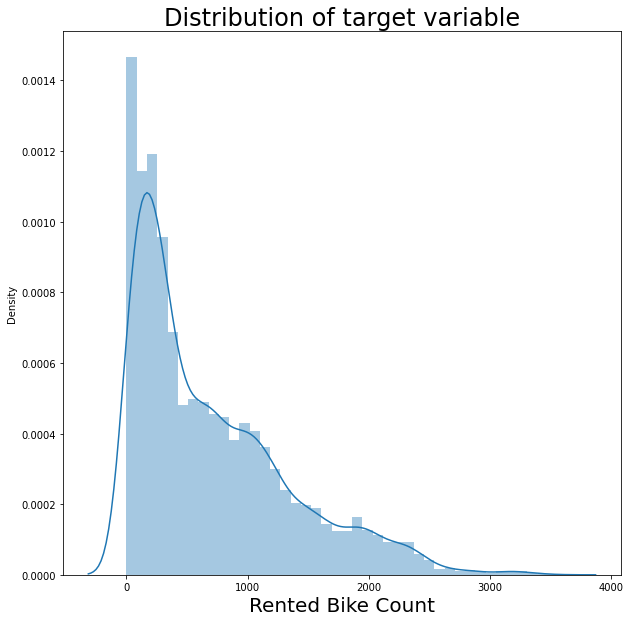

In [ ]:
# Distribution of Bike rent count
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=seoul_df["Rented Bike Count"])
ax.set_xlabel( "Rented Bike Count" , size = 20 )
ax.set_title( "Distribution of target variable" , size = 24 )
# fig.savefig('bike count.png')

In [ ]:
skewness = skew(seoul_df['Rented Bike Count'])
skewness

1.1532306631480034

Target variable is skewed positively. lets check the skewness value before poceed for further transformation.

  1) If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

  2) If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

  3) If the skewness is less than -1 or greater than 1, the data are highly skewed.

  Our feature fells in third category, resulted skewness is 1.1532. our data highly skewed.

When we load skewed transformation into the model it makes our model influenced to the extreme values. so we have to normalize the points before loading datas into the model.

There different Transformtion to resolve skewed distribution to approximate norml distribution, like
  

1.   Log transformation
2.   Inverse transormation

3.   Square root transformation

No bikes rented Non function days, due to that first two transformation will pop error because the presence of "ZERO". Therefor I am choosing square root transformation to normalize the distribution. 










**Square Root transformation:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sqrt Distribution of target variable')

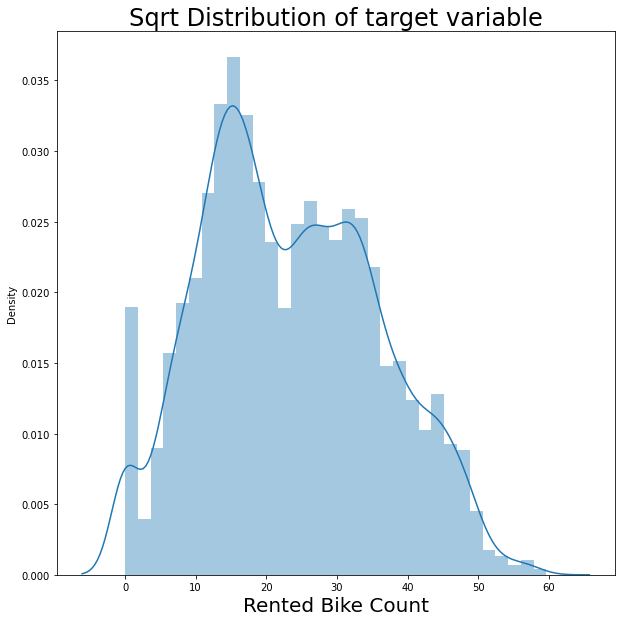

In [ ]:
# Dependent variable 'Price'
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot(x = np.sqrt(seoul_df['Rented Bike Count']))
ax.set_xlabel( "Rented Bike Count" , size = 20 )
ax.set_title( "Sqrt Distribution of target variable" , size = 24 )
# fig.savefig('bike count3.png')

In [ ]:
# skewness after transformation
skewness = skew(np.sqrt(seoul_df['Rented Bike Count']))
skewness

0.23732144485836718

As you seen, after square root transformation our skewness value reduced to    0.2373 its fells under first category(Fairly Symmetrical) as described above. But notice resulted distribution has local minima and two local maxima.

**Hour:**

---



In [ ]:
seoul_df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Here 0 might represents bikes rented for less than one hour, and also people rented bikes for 23 hours too (almost day).

And also maximum hour rented is 23, it constitute single person can rent bike for maximum 23 hours, for more he/she have to make new booking. Users can hold bike maximum a day.

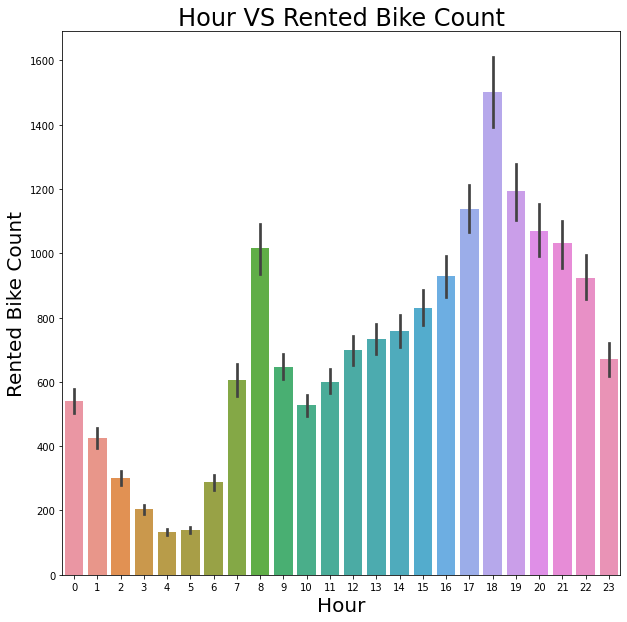

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.barplot(x="Hour", y="Rented Bike Count", data=seoul_df)
ax.set_xlabel( "Hour" , size = 20 )
ax.set_ylabel('Rented Bike Count',fontsize=20);
ax.set_title( "Hour VS Rented Bike Count" , size = 24 )
fig.savefig('bar plot.png')

Almost 50% bikes are rented more than 10 Hours. Its a good sign to the business. 

**Temprature:**

---



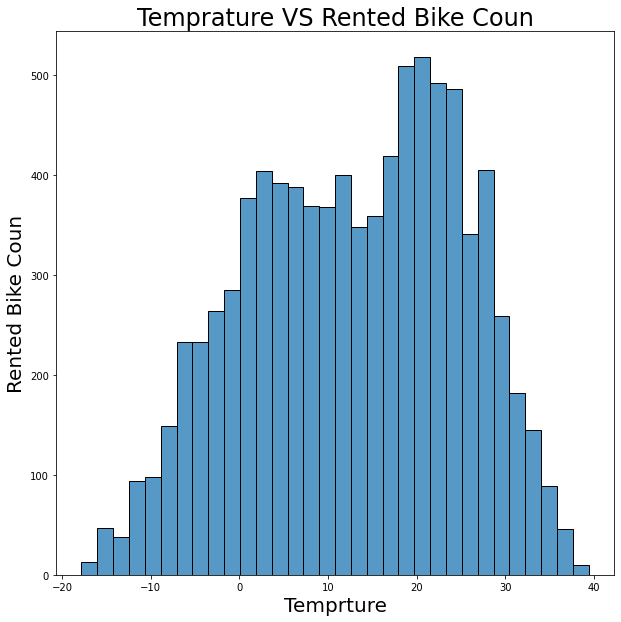

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.histplot(data =seoul_df, x="Temperature(°C)")
ax.set_xlabel( "Temprture" , size = 20 )
ax.set_ylabel('Rented Bike Coun',fontsize=20);
ax.set_title( "Temprature VS Rented Bike Coun" , size = 24 )
fig.savefig('Temprature.png')

Temprature has continous Datapoints, we chosen Histogram for better understanding.

As we made hypothesis earlier, Higher the temprature lower the bike rent count.
Its evident here to Whenever temprature registered less than 0 or more than 30 degrees. Bike rented counts also reduced.

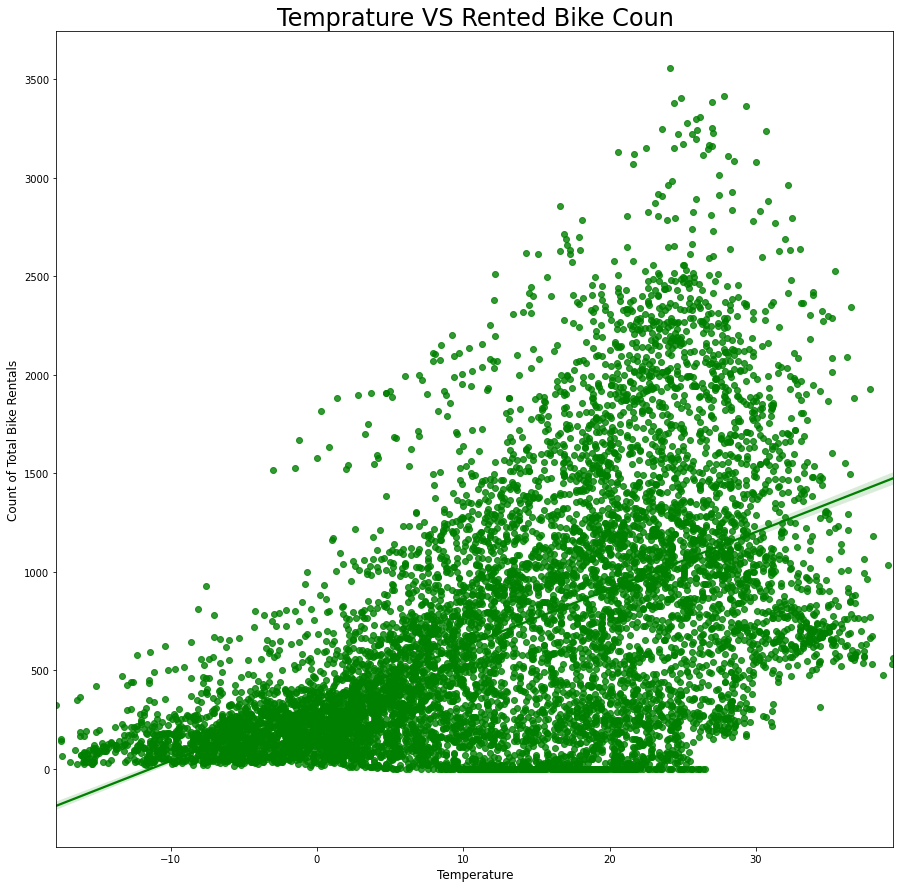

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot(x="Temperature(°C)", y="Rented Bike Count", data=seoul_df,color="g",fit_reg=True)
plt.xlabel('Temperature', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Temprature VS Rented Bike Coun" , size = 24 )
fig.savefig('Temprature2.png')

And also temprature has positively correlated with bike rented counts, but we can see here some days when temprature between 20-30 degrees, number bikes get rented is far high its seems to outliers. we have handle those peak values to avoid bias in our prediction.

**Humidity:**

---



Regplot for humidity shows it has negative correlation with bike rental. Higher the humidity lower the usage.

Since as we seen towards left some extreme points are registered. 

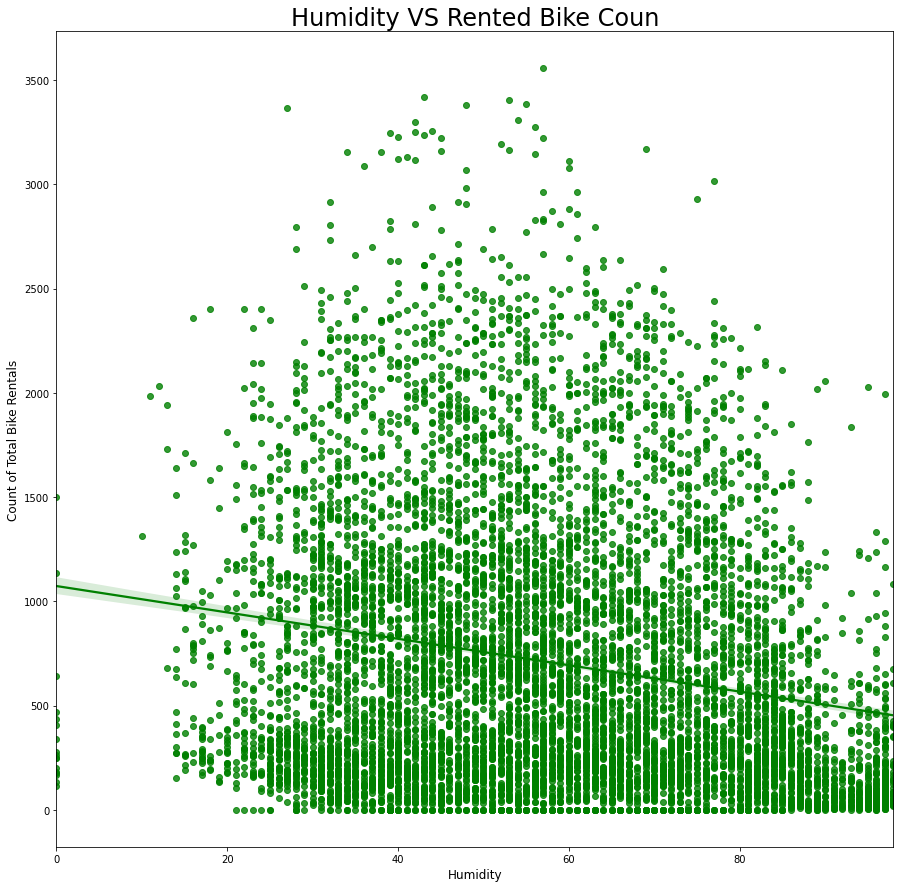

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot(x="Humidity(%)", y="Rented Bike Count", data=seoul_df,color="g",fit_reg=True)
plt.xlabel('Humidity', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Humidity VS Rented Bike Coun" , size = 24 )
fig.savefig('Humidity.png')

In [ ]:
seoul_df['Humidity(%)'].describe([0.01,0.1,.25, .5, .75,.99])

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
1%         17.000000
10%        32.000000
25%        42.000000
50%        57.000000
75%        74.000000
99%        97.000000
max        98.000000
Name: Humidity(%), dtype: float64

From plot and five point summary is it confirmed there is an huge drop from 1%(percentile) to min. That considered as a Outliers. We have handle them before load to the model. These extreme values will surely influenced and biased our prediction.

Like Random forest, uses "Reduction on Variance" to choose feature to split and "weighte averge" to summarize. There we encounter some problem by the presence of outlier.

There are different methods to treat outliers wisely.


1.   Drop outliers
2.   Floor and capping

1.   Z-Score Transformation

Here I am following second method Floor and capping, by this here I limit the my feature value should not cross the lower and upper bound. Instead of dropping there is no loss of insformation by this method





In [ ]:
# Floor THE Humidity less than 17 with one percentile value 
seoul_df.loc[seoul_df['Humidity(%)']<=17,'Humidity(%)'] = 17

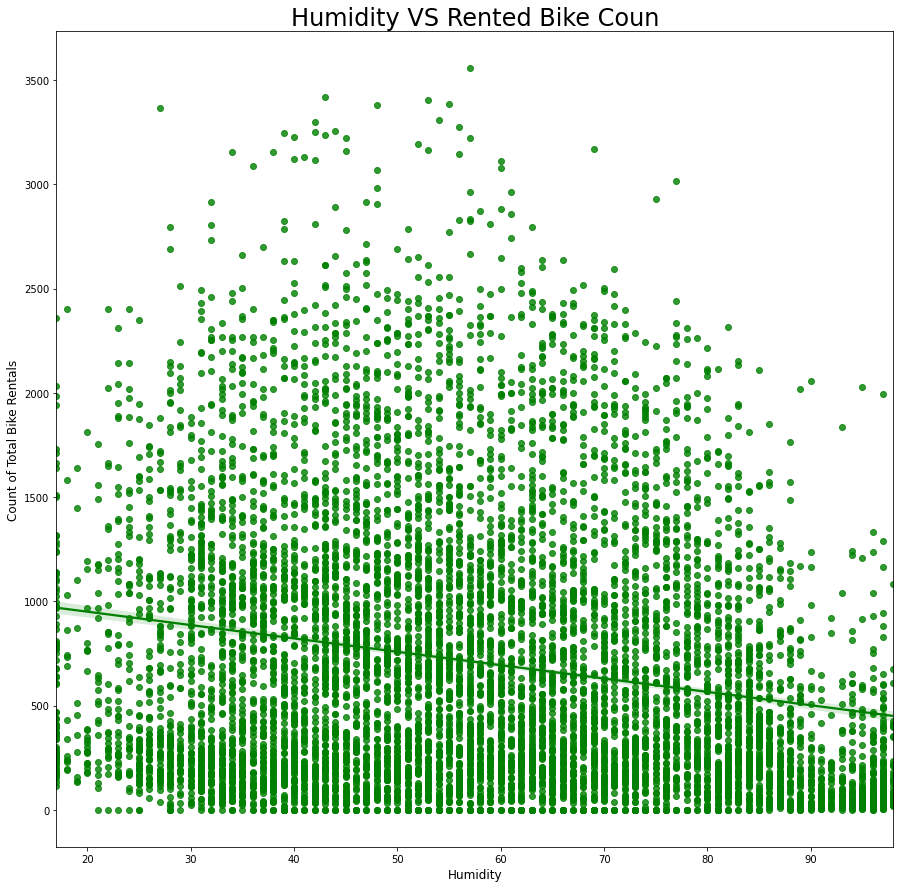

In [ ]:
# reg plot after flooring
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot(x="Humidity(%)", y="Rented Bike Count", data=seoul_df,color="g",fit_reg=True)
plt.xlabel('Humidity', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Humidity VS Rented Bike Coun" , size = 24 )
fig.savefig('Humidityafter floor.png')

**Wind speed:**

---



Wind speed has positive correlation with rented bike counts, here too some extreme values are present at higher end. Capping had done with 99% Percentile value

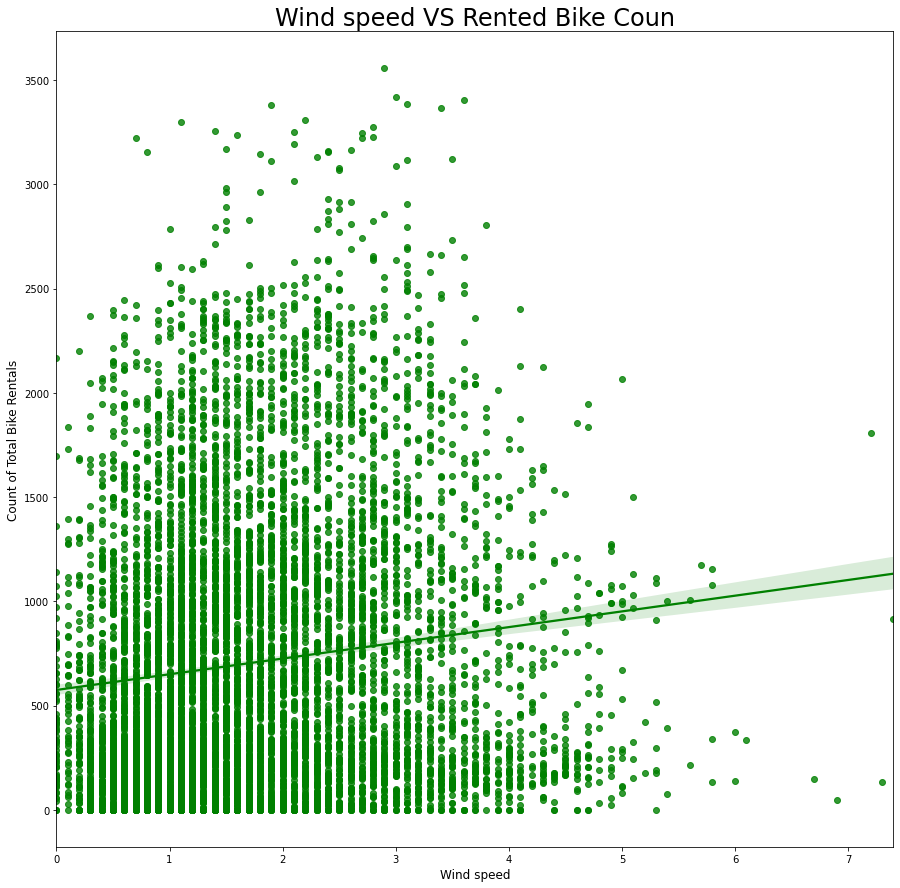

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot(x="Wind speed (m/s)", y="Rented Bike Count", data=seoul_df,color="g",fit_reg=True)
plt.xlabel('Wind speed', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Wind speed VS Rented Bike Coun" , size = 24 )
fig.savefig('Wind speed.png')


In [ ]:
seoul_df['Wind speed (m/s)'].describe([.01,.05,0.95,0.96,0.97,0.98,0.99])

count    8760.000000
mean        1.724909
std         1.036300
min         0.000000
1%          0.100000
5%          0.400000
50%         1.500000
95%         3.700000
96%         3.864000
97%         4.000000
98%         4.300000
99%         4.700000
max         7.400000
Name: Wind speed (m/s), dtype: float64

In [ ]:
# Cap THE wind speed greater than 6 with 99 percentile value 
seoul_df.loc[seoul_df['Wind speed (m/s)']>=4.7,'Wind speed (m/s)'] = 4.7

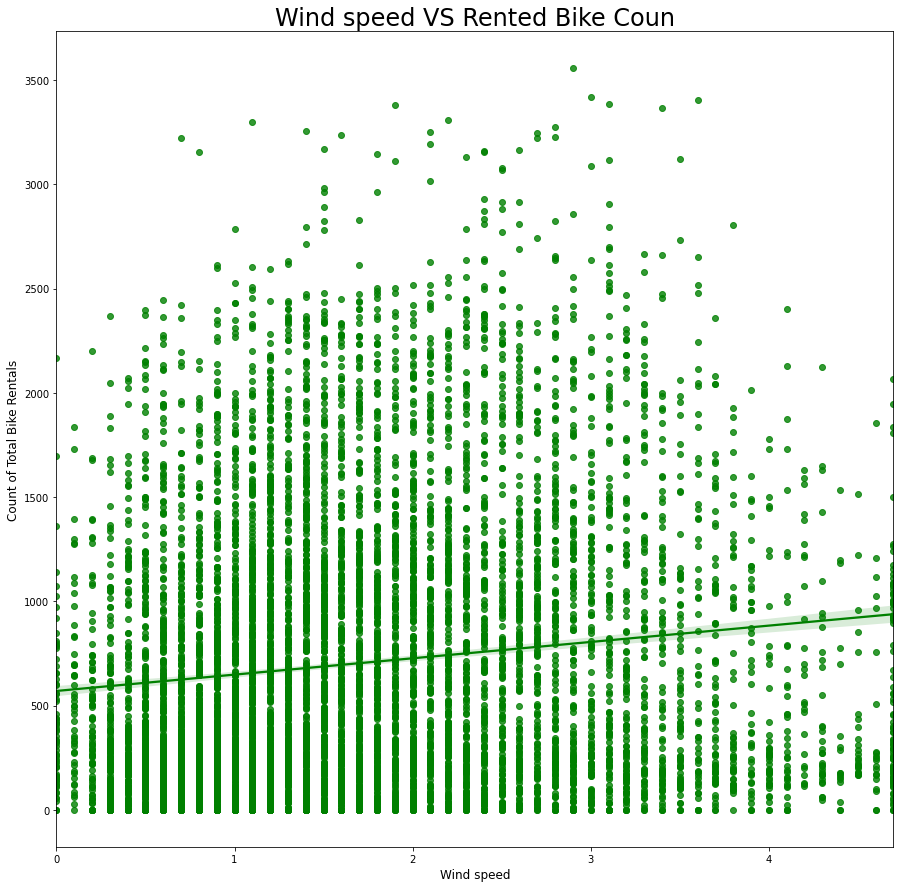

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot(x="Wind speed (m/s)", y="Rented Bike Count", data=seoul_df,color="g",fit_reg=True)
plt.xlabel('Wind speed', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Wind speed VS Rented Bike Coun" , size = 24 )
fig.savefig('Wind speed after cap.png')

**Visibility:**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


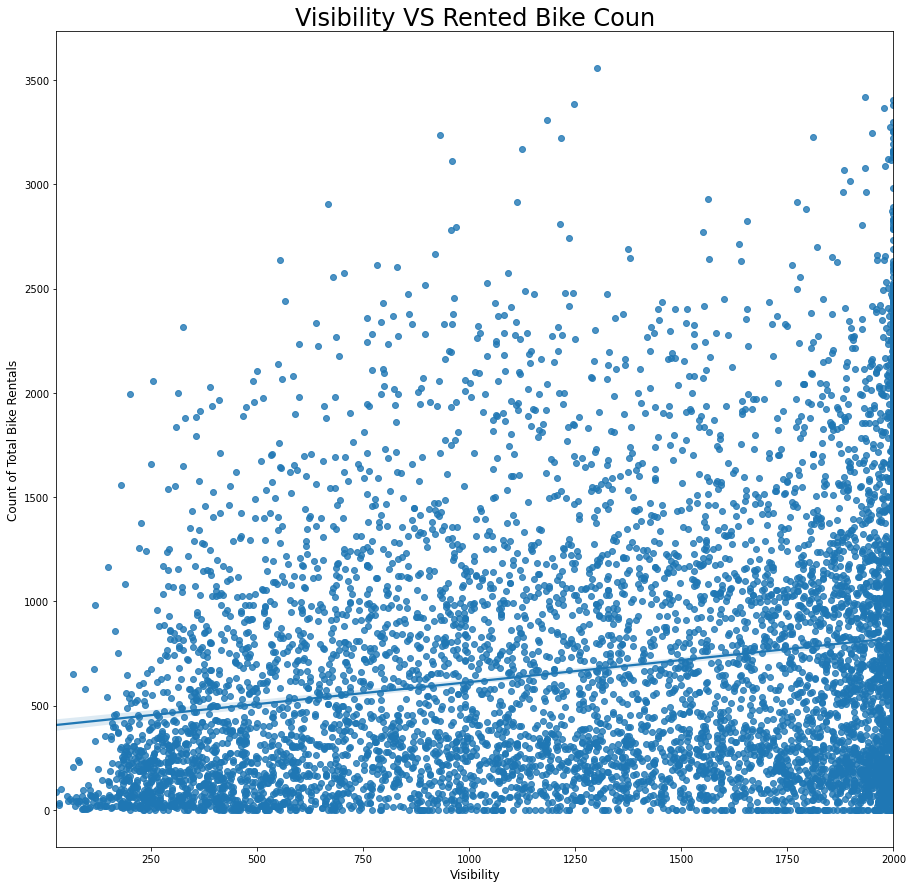

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Visibility (10m)', 'Rented Bike Count', data=seoul_df)
plt.xlabel('Visibility', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Visibility VS Rented Bike Coun" , size = 24 )
fig.savefig('Visibility.png')

Visibility hving moderate positive correlation with rented counts. And also no extreme values avalable to handle. 

**Dew ponit temprature:**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


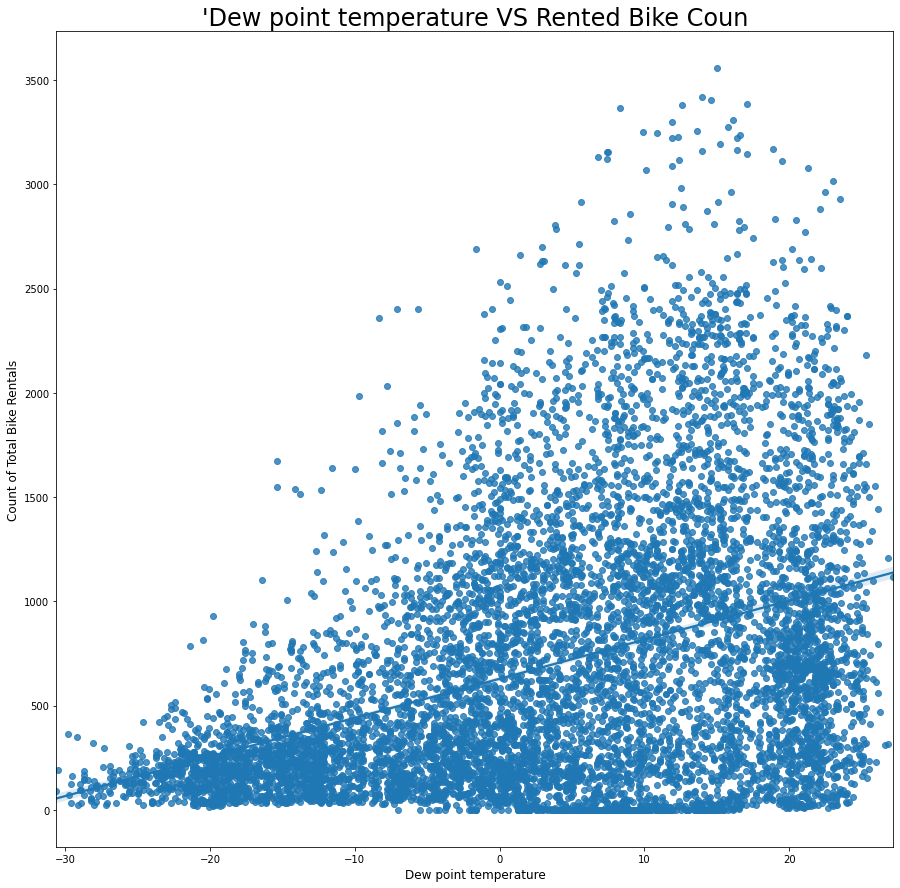

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Dew point temperature(°C)', 'Rented Bike Count', data=seoul_df)
plt.xlabel('Dew point temperature', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "'Dew point temperature VS Rented Bike Coun" , size = 24 )
fig.savefig('Dew point temperature.png')

Original data not having any odd values, no transformation requied. 

**Solar Radiation:**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


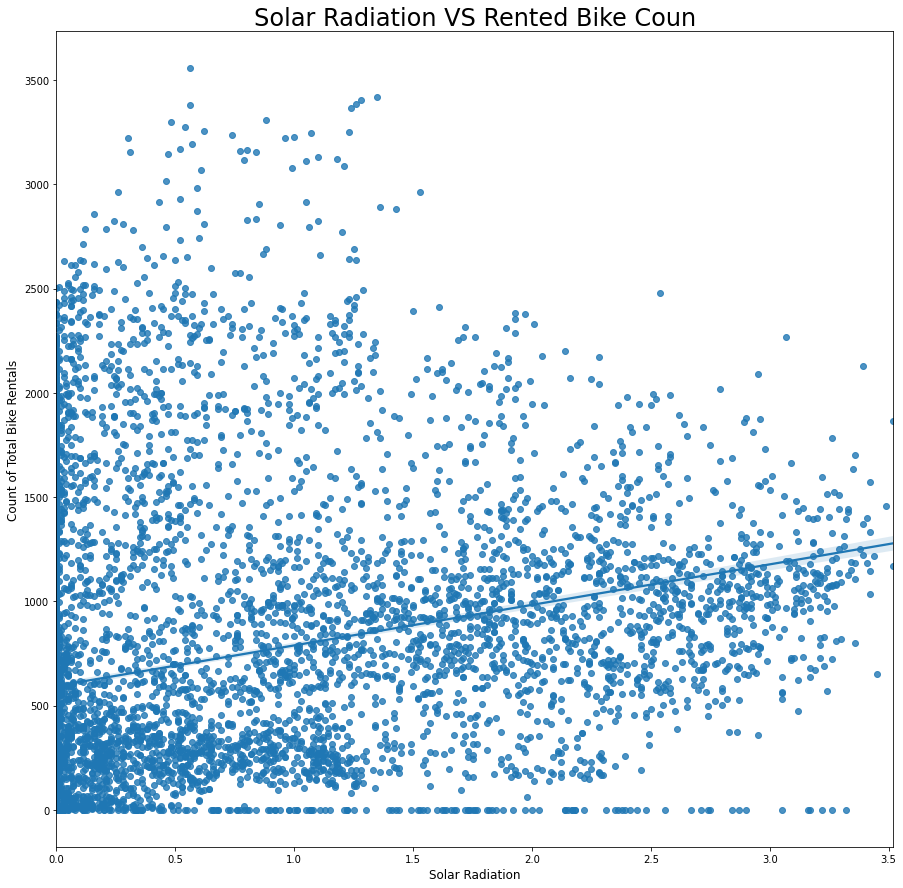

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Solar Radiation (MJ/m2)', 'Rented Bike Count', data=seoul_df)
plt.xlabel('Solar Radiation', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Solar Radiation VS Rented Bike Coun" , size = 24 )
fig.savefig('Solar Radiation.png')

Since solar radiation has positive correlation with response, number users preferred to ride at low radiation days. Maximum count registerd at middle of the plots

**Rainfall:**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


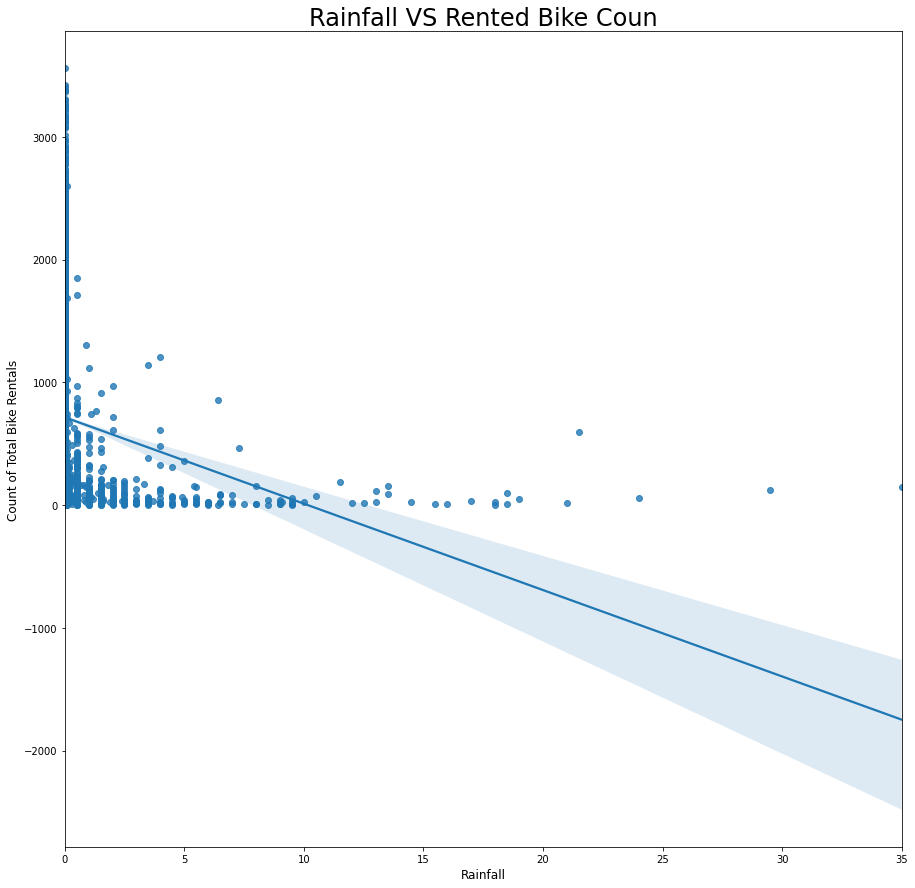

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Rainfall(mm)', 'Rented Bike Count', data=seoul_df)
plt.xlabel('Rainfall', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Rainfall VS Rented Bike Coun" , size = 24 )
fig.savefig('Rainfall.png')

Rainfall feature having too extreme values it might to treat them, same capping the higher values as done before.

In [ ]:
seoul_df['Rainfall(mm)'].describe([.01,.05,0.95,0.96,0.97,0.98,0.99])

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
1%          0.000000
5%          0.000000
50%         0.000000
95%         0.400000
96%         0.500000
97%         1.000000
98%         2.000000
99%         4.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

In [ ]:
# cAP THE rainfall greater than 4.0 with 99 percentile value 
seoul_df.loc[seoul_df['Rainfall(mm)']>=4.0,'Rainfall(mm)'] = 4.0

In [ ]:
seoul_df['Rainfall(mm)'].describe([.01,.05,0.95,0.96,0.97,0.98,0.99])

count    8760.000000
mean        0.097260
std         0.512681
min         0.000000
1%          0.000000
5%          0.000000
50%         0.000000
95%         0.400000
96%         0.500000
97%         1.000000
98%         2.000000
99%         4.000000
max         4.000000
Name: Rainfall(mm), dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


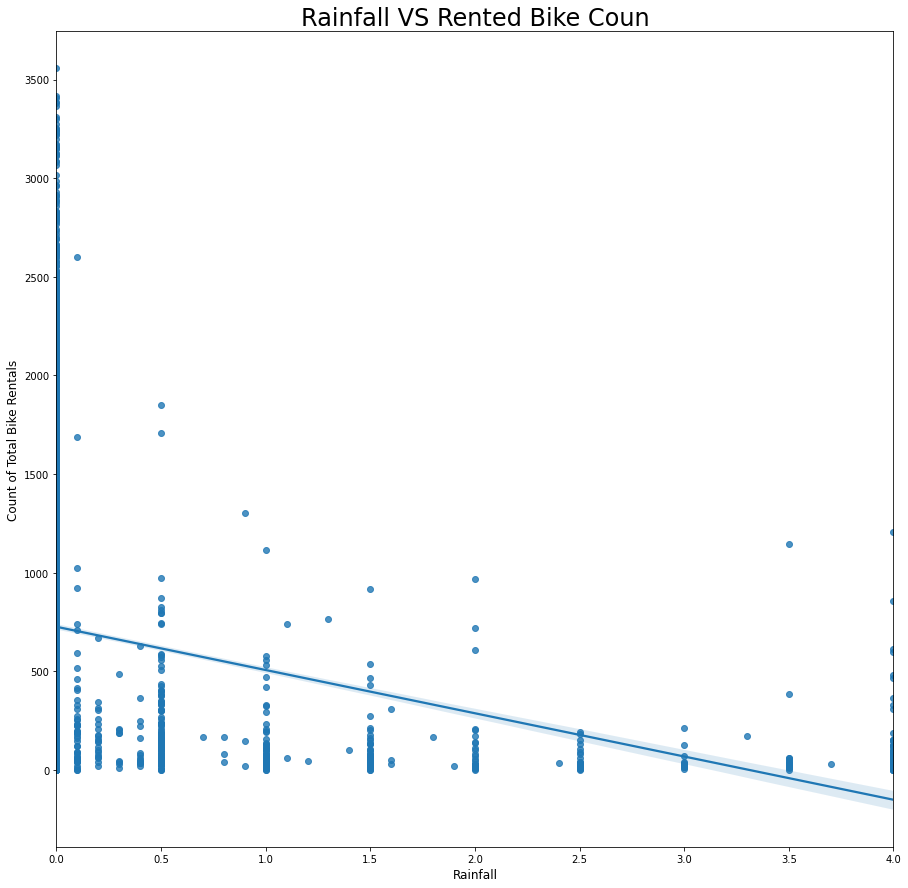

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Rainfall(mm)', 'Rented Bike Count', data=seoul_df)
plt.xlabel('Rainfall', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Rainfall VS Rented Bike Coun" , size = 24 )
fig.savefig('Rainfall after capping.png')

**Snowfall:**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


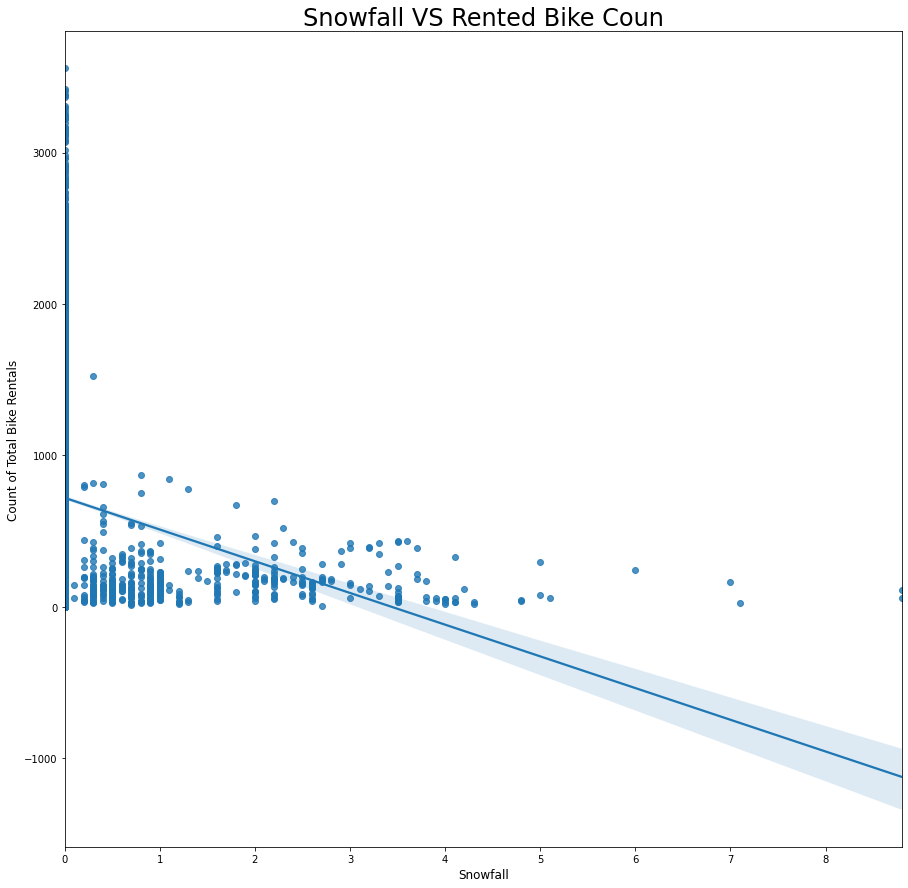

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Snowfall (cm)', 'Rented Bike Count', data=seoul_df)
plt.xlabel('Snowfall', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Snowfall VS Rented Bike Coun" , size = 24 )
fig.savefig('Snowfall.png')

Snowfall follows same pattern as Rainfall, so the same process repeated for snowfall too. 

In [ ]:
seoul_df['Snowfall (cm)'].describe([.01,.05,0.95,0.96,0.97,0.98,0.99])

count    8760.000000
mean        0.075068
std         0.436746
min         0.000000
1%          0.000000
5%          0.000000
50%         0.000000
95%         0.200000
96%         0.500000
97%         0.800000
98%         1.300000
99%         2.500000
max         8.800000
Name: Snowfall (cm), dtype: float64

In [ ]:
# cAP THE rainfall having extreme values with 99 percentile value 
seoul_df.loc[seoul_df['Snowfall (cm)']>=2.5,'Snowfall (cm)'] = 2.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


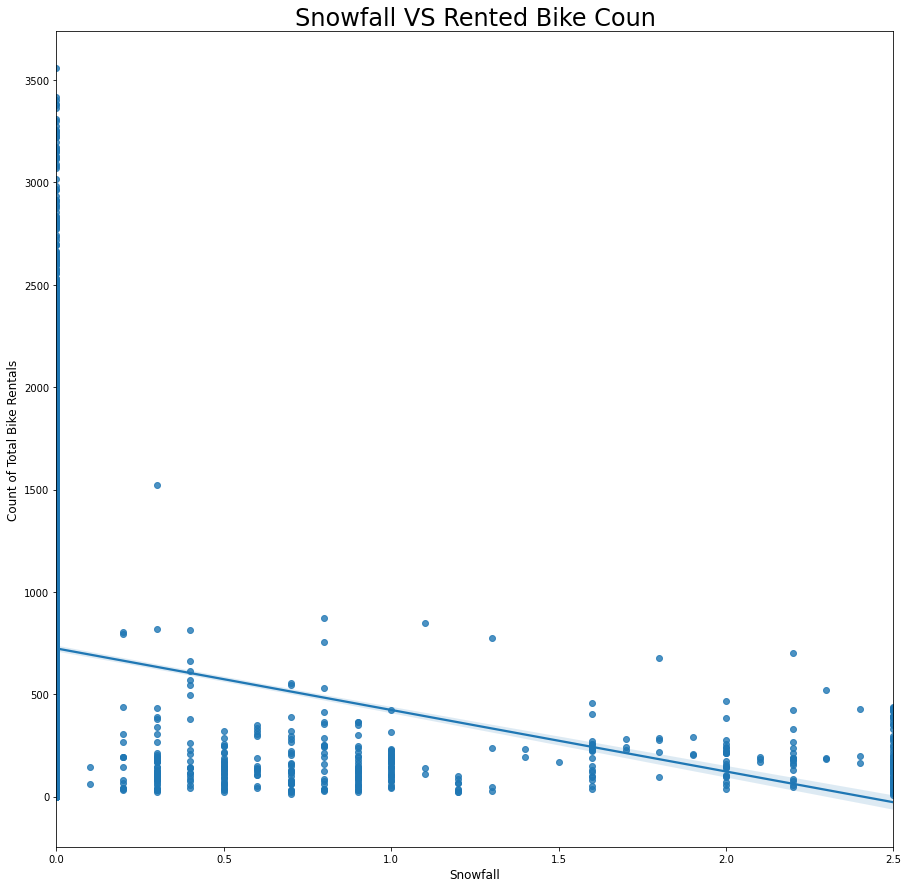

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Snowfall (cm)', 'Rented Bike Count', data=seoul_df)
plt.xlabel('Snowfall', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Snowfall VS Rented Bike Coun" , size = 24 )
fig.savefig('Snowfall after cap .png')

**Categorical Features:**

---



**Seasons**


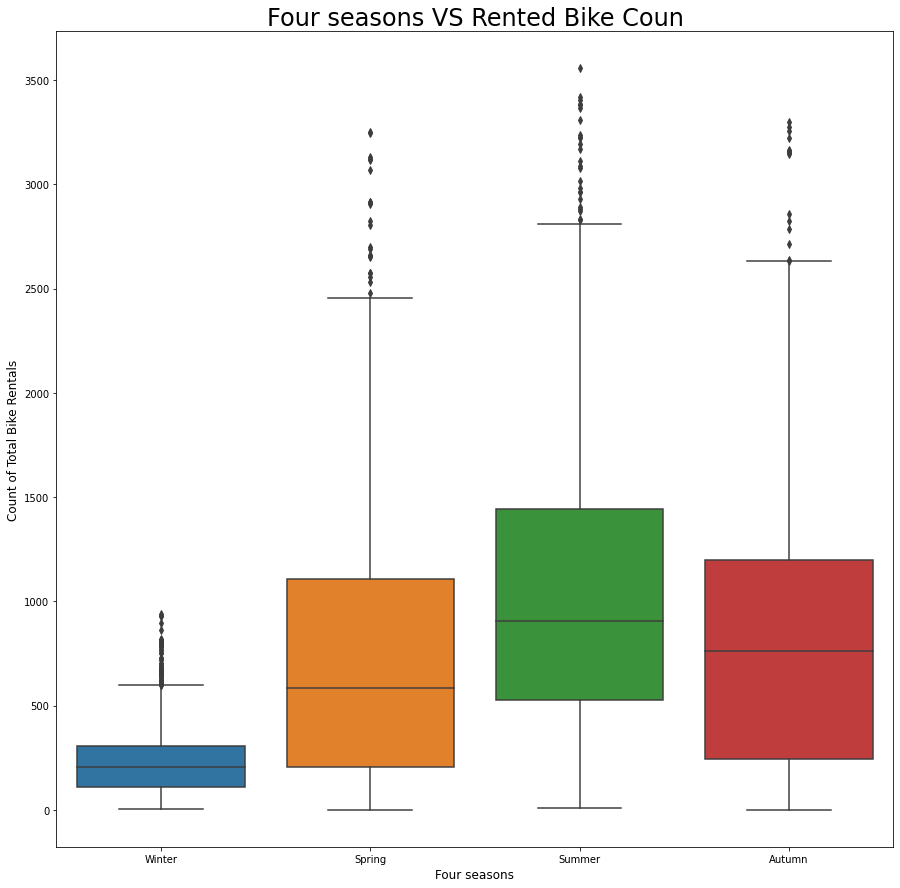

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Seasons", y="Rented Bike Count", data=seoul_df)
plt.xlabel('Four seasons', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Four seasons VS Rented Bike Coun" , size = 24 )
fig.savefig('Four seasons .png')

**winter** - In winter we have colder weather, sometimes snow and frost, the trees have no leaves and the amount of time it is light during the day is at its shortest. Usage of service drastically reduced during winter season.

**Spring** - In spring the weather usually turns warmer, trees begin to grow their leaves, plants start to flower and young animals such as chicks and lambs are born. Comparatively spring gotten pleasent hike in usage.

**Summer** - Summer is the hottest of the four temperate seasons, falling after spring and before autumn. At or around the summer solstice, the earliest sunrise and latest sunset occurs, the days are longest and the nights are shortest. This is the season most the people got engaged with our service

**Autumn (fall)** - autumn marks the transition from summer to winter, in September or March, when the duration of daylight becomes noticeably shorter and the temperature cools considerably. As name suggests there is fall in usage comparatively with Summer


**Holiday:**

---



Holiday feature contains two disting values 'Holiday' & 'No Holiday'. Logically Non holiday should have descent usage rate as compare with holidyas. Our plots too resembles the same.

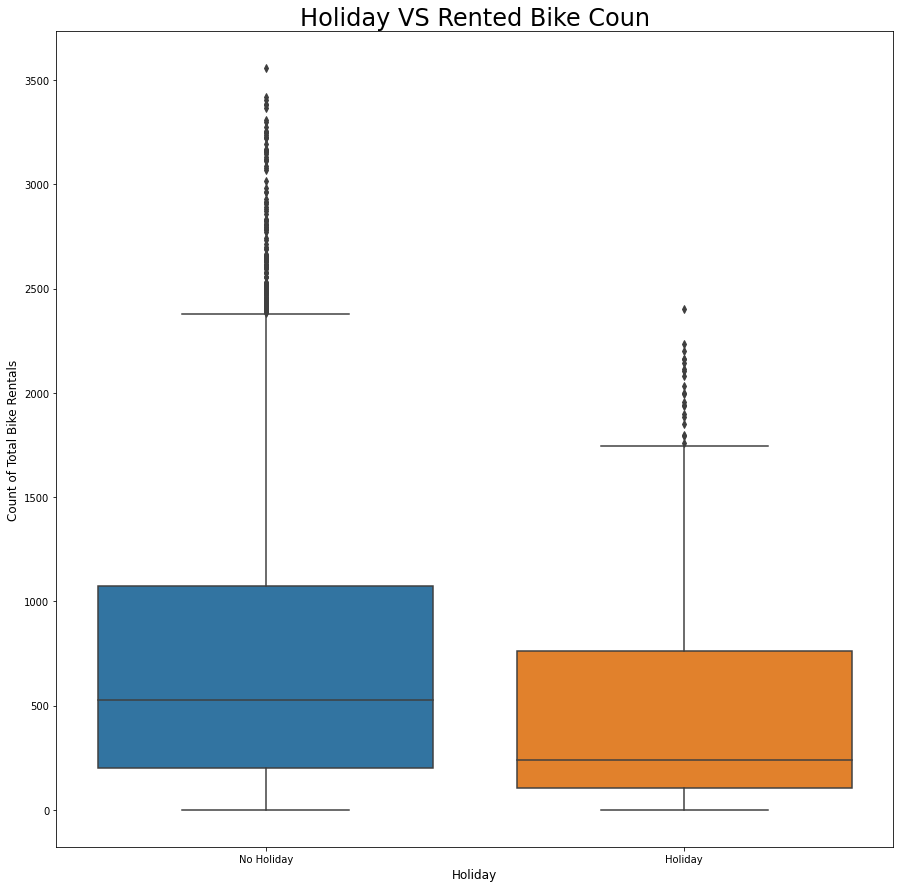

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Holiday", y="Rented Bike Count", data=seoul_df)
plt.xlabel('Holiday', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Holiday VS Rented Bike Coun" , size = 24 )
fig.savefig('Holiday .png')

In [ ]:
holiday = seoul_df.groupby('Holiday').agg({'Rented Bike Count':'sum'})
holiday['usage %'] = (holiday['Rented Bike Count'] / (215895 + 5956419)) * 100
holiday.to_excel('out-put.xlsx')
holiday

Rented Bike Count    usage %
Holiday                                 
Holiday                215895   3.497797
No Holiday            5956419  96.502203

96% of usage recorded on Working days its shows our most of the users are working professionals and college students. This is the good sign to business there is less likelihood that these users will vandalise the bikes.

**Function Day:**

---



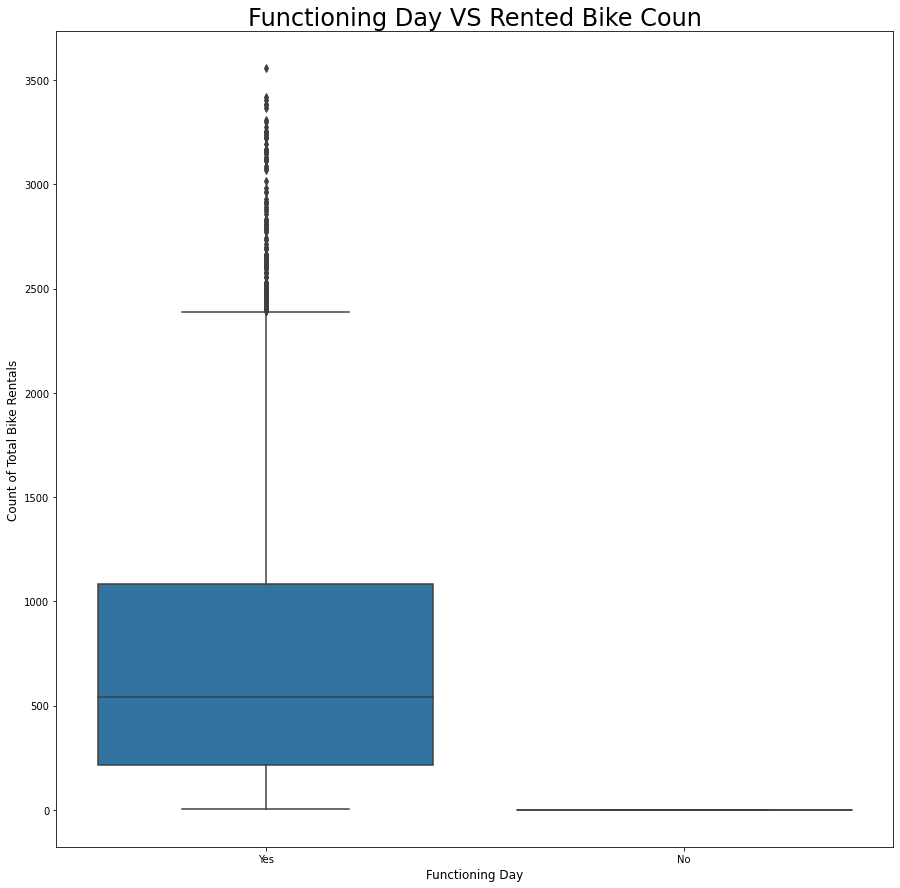

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Functioning Day", y="Rented Bike Count", data=seoul_df)
plt.xlabel('Functioning Day', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Functioning Day VS Rented Bike Coun" , size = 24 )
fig.savefig('Functioning Day.png')

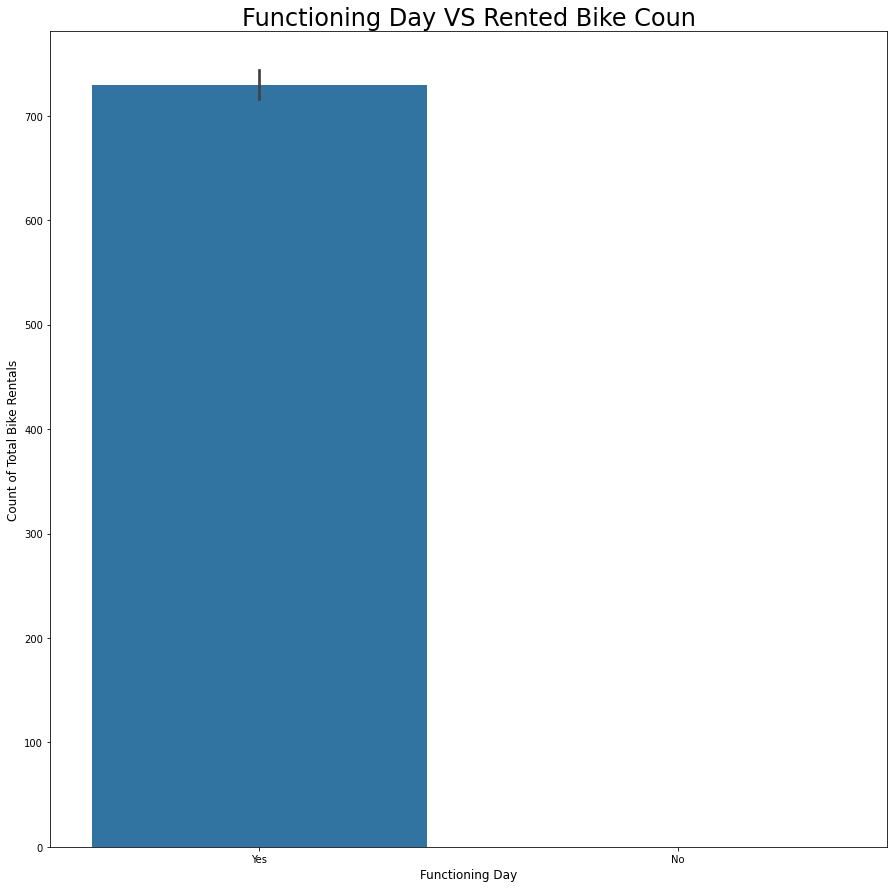

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=seoul_df)
plt.xlabel('Functioning Day', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Functioning Day VS Rented Bike Coun" , size = 24 )
fig.savefig('Functioning Day bar plot.png')

Above plot constitute bike rented count on non functioning day is none, those subset not contribute much to our prediction, so its not essential to feed these observation into our prediction model. Our model prediction will conserve by how conserve we feed information in it.

In [ ]:
# lets copy our dataset
seoul_df1 = seoul_df.copy()

In [ ]:
# remove the subset of non function days
seoul_df1 = seoul_df1[seoul_df1['Functioning Day']=='Yes']

**YEAR:**

---



In [ ]:
seoul_df1['Year'].unique()

array([2017, 2018])

Year feature has two distict values as "2017" & "2018". Progressively our service get popular amoung peoples. Since data were recorded from Last two month of 2017 model cant generalize well business develops over the years. So here i am decides to hold out "2017" from model input.

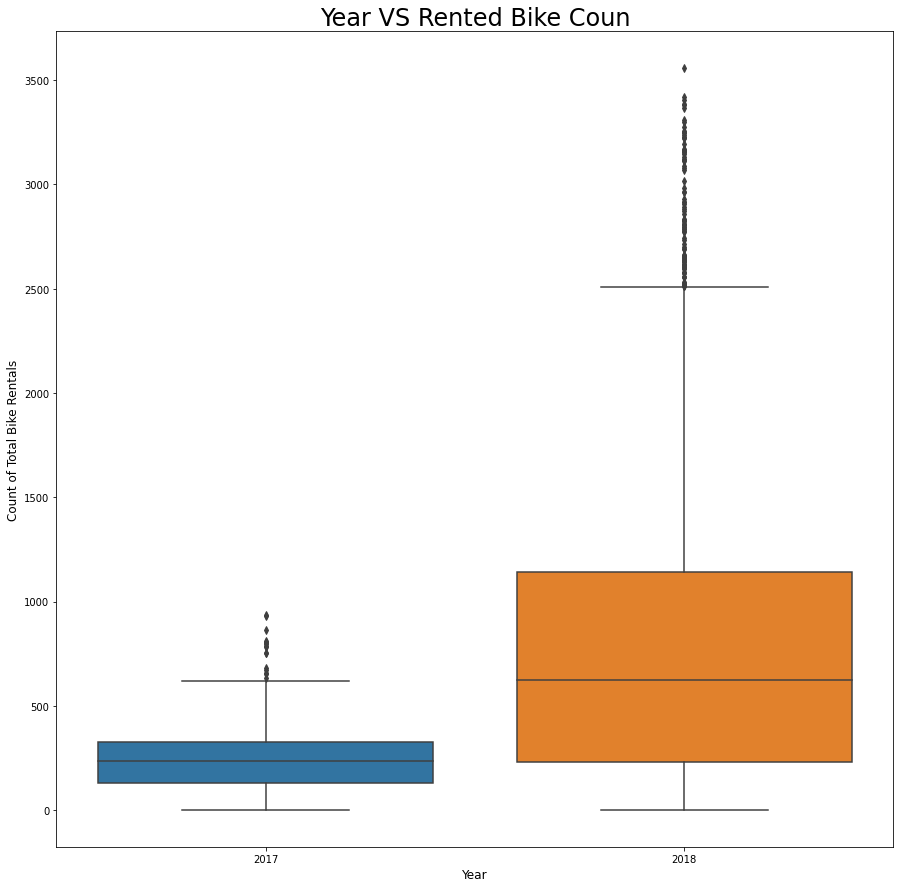

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Year", y="Rented Bike Count", data=seoul_df1)
plt.xlabel('Year', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Year VS Rented Bike Coun" , size = 24 )
fig.savefig('Year bar plot.png')

number of bikes rented in 2018 is weigh up as compare to previous year. It shows bike sharing servise had positive response from the people of seoul.

In [ ]:
year = seoul_df.groupby('Year').agg({'Year':'count'})
year['pearcent'] = (year['Year']/(744+8016)) * 100
year.to_excel('out-put.xlsx')
year

Year   pearcent
Year                 
2017   744   8.493151
2018  8016  91.506849

In [ ]:
del seoul_df1['Date']
del seoul_df1['date']
del seoul_df1['Year']

**Month:**

---



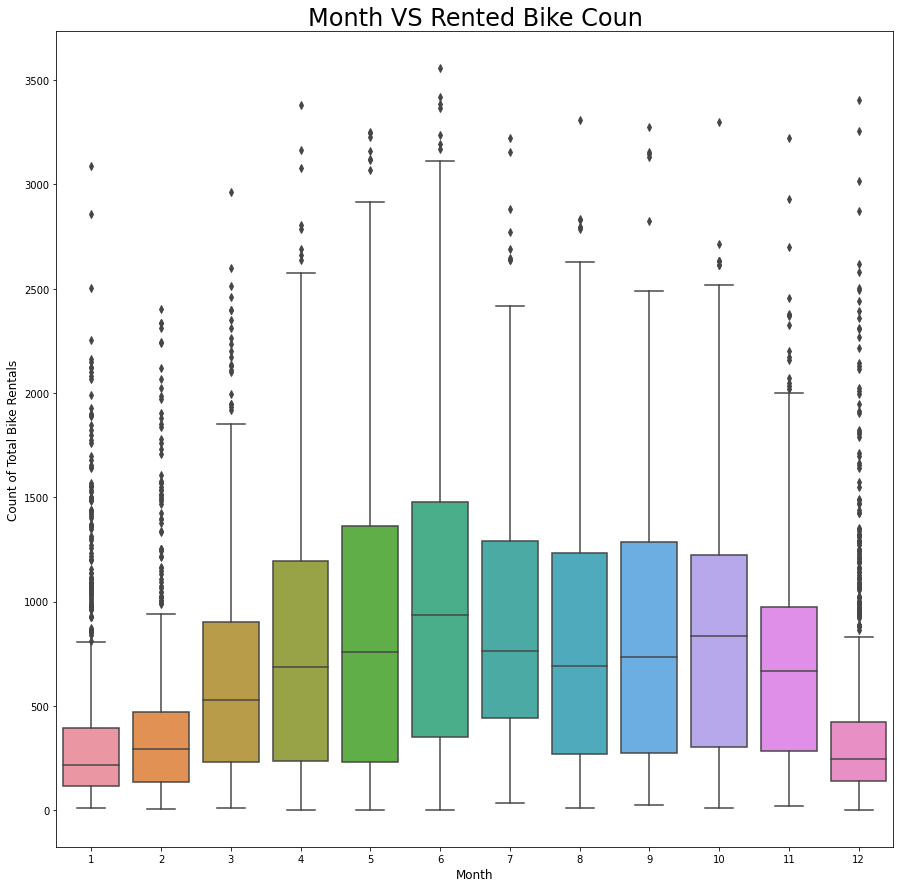

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Month", y="Rented Bike Count", data=seoul_df1)
plt.xlabel('Month', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Month VS Rented Bike Coun" , size = 24 )
fig.savefig('Month bar plot.png')

Month distribution resembles as like Seasons, Drop in winter(Dec - Feb), slight increses in Mar - Apr(Spring), Reaches peak Jun - Aug(Summer) and falls in Sep - Nov(Autumn)

And this represents Central Limit Theorm. Approximate normal Distribution between months.

**Week Day:**

---



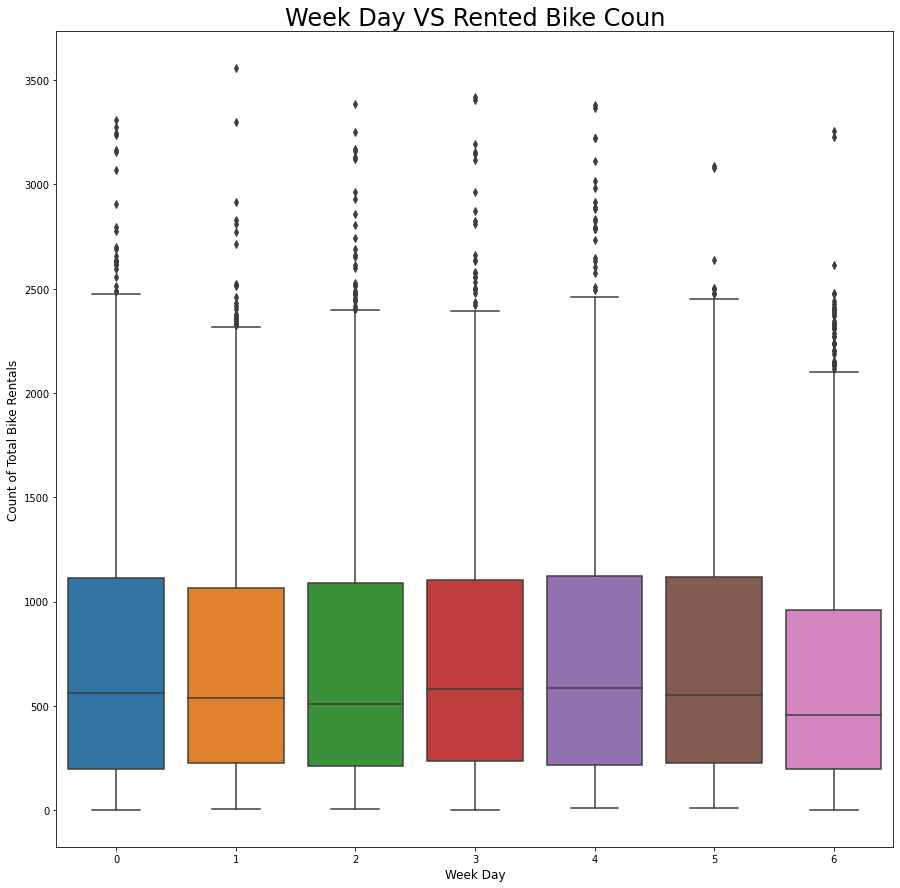

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="week day", y="Rented Bike Count", data=seoul_df1)
plt.xlabel('Week Day', fontsize='large')
plt.ylabel('Count of Total Bike Rentals', fontsize='large')
ax.set_title( "Week Day VS Rented Bike Coun" , size = 24 )
fig.savefig('Week Day box plot.png')

There is no variation across the weeks, bit a drop on saturday.

**Hours Rented of Bikes across the weeks:**

---



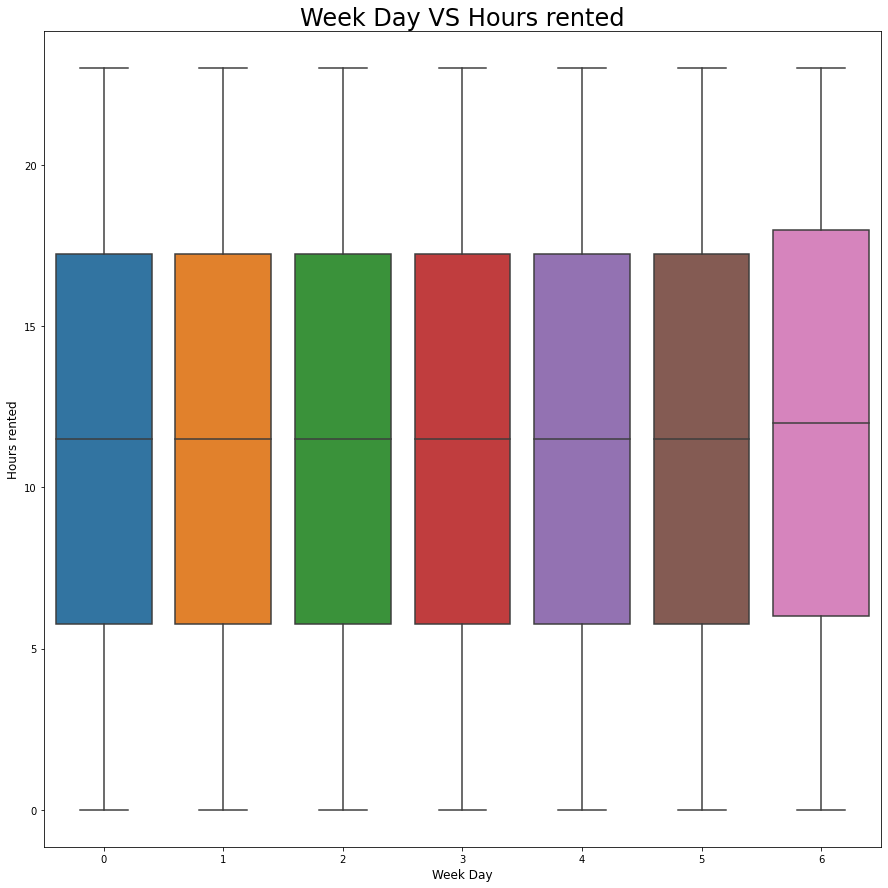

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="week day", y="Hour", data=seoul_df1)
plt.xlabel('Week Day', fontsize='large')
plt.ylabel('Hours rented', fontsize='large')
ax.set_title( "Week Day VS Hours rented" , size = 24 )
fig.savefig('Week Day2 box plot.png')

Here, it seems no diffrenece in usage, our service all day in week get engaged with users. But contrary to counts, there is bit hike in sataurday it seems, our service also used by normal users rather than working professionals, students etc.

**Bivariate Analysis:**

**Heat Map:**

---



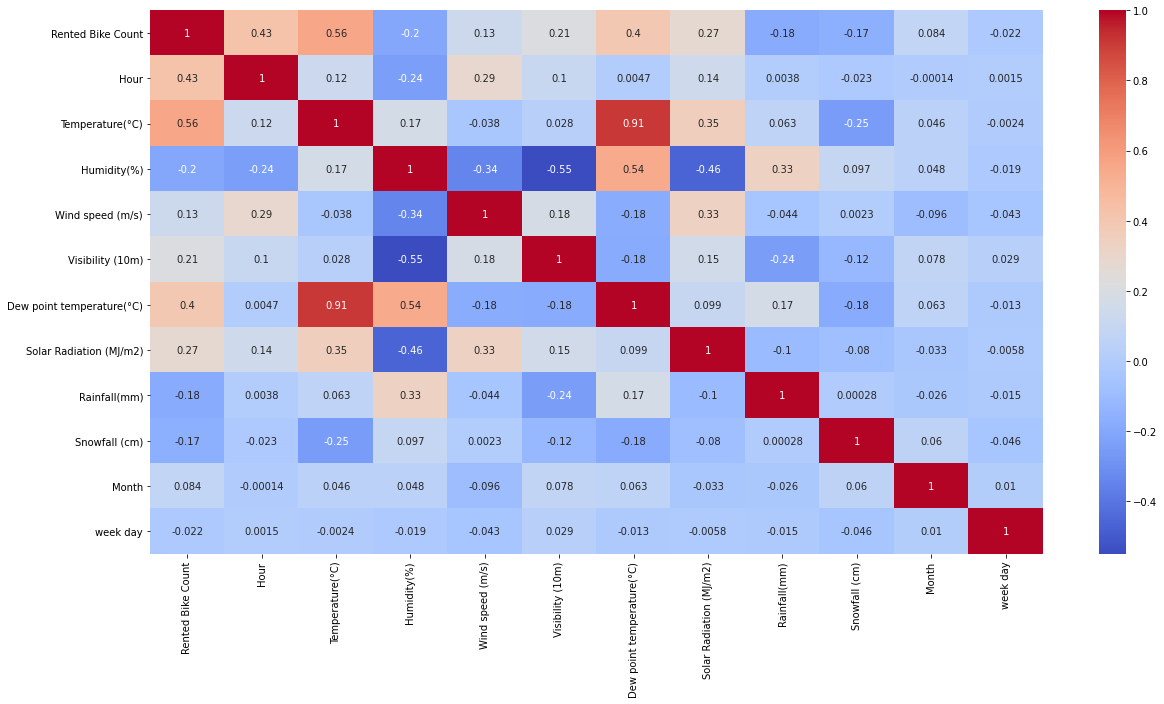

In [ ]:
 ## Correlation
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = seoul_df1.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
fig.savefig('Heat Map1.png')

Hour, Temprature, Dew point temprature had moderate correlation with response variable.

Temprature and Dew point Temprature has strong positive correlation of 0.91

Humidity had correlated with wind speed, visibility, Solar Radiation & Dew point Temprature.

Lets try some bivariant plot for detailed exploration.

**Dew point vs Temprature:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


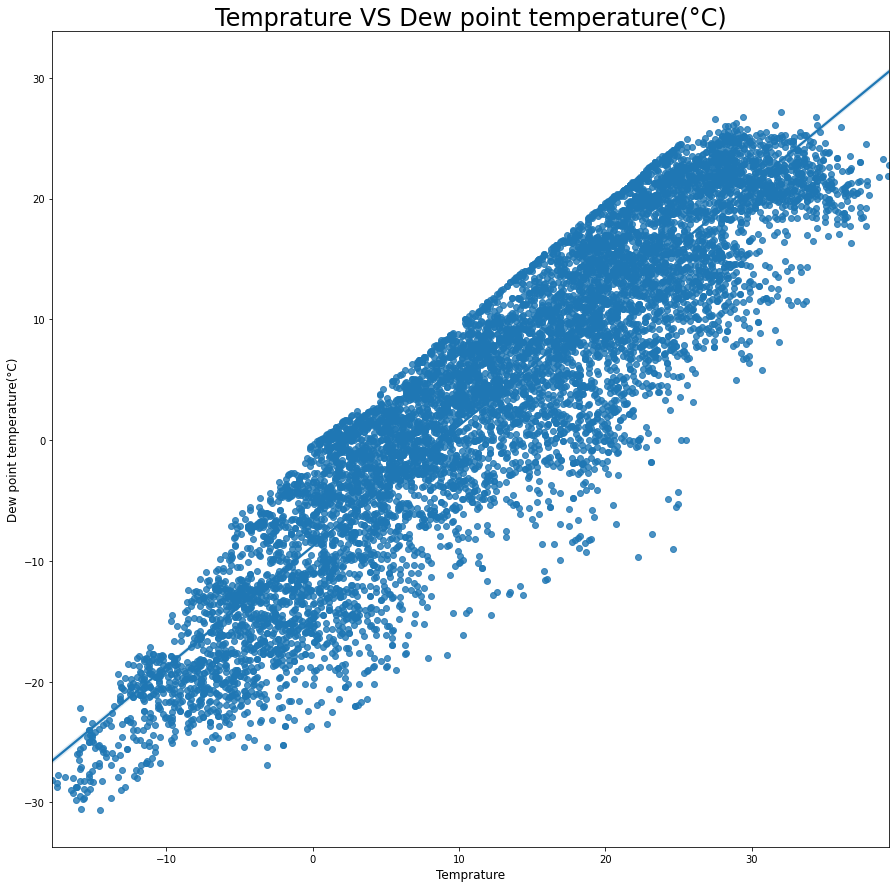

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Temperature(°C)', 'Dew point temperature(°C)', data=seoul_df)
plt.xlabel('Temprature', fontsize='large')
plt.ylabel('Dew point temperature(°C)', fontsize='large')
ax.set_title( "Temprature VS Dew point temperature(°C)" , size = 24 )
fig.savefig('scatter plot 1.png')

Temprature and due point temprature is highly correlated with co-efficient of 0.91. we have to consider one of these variable before load into model.

**Solar radiation vs Humidity:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


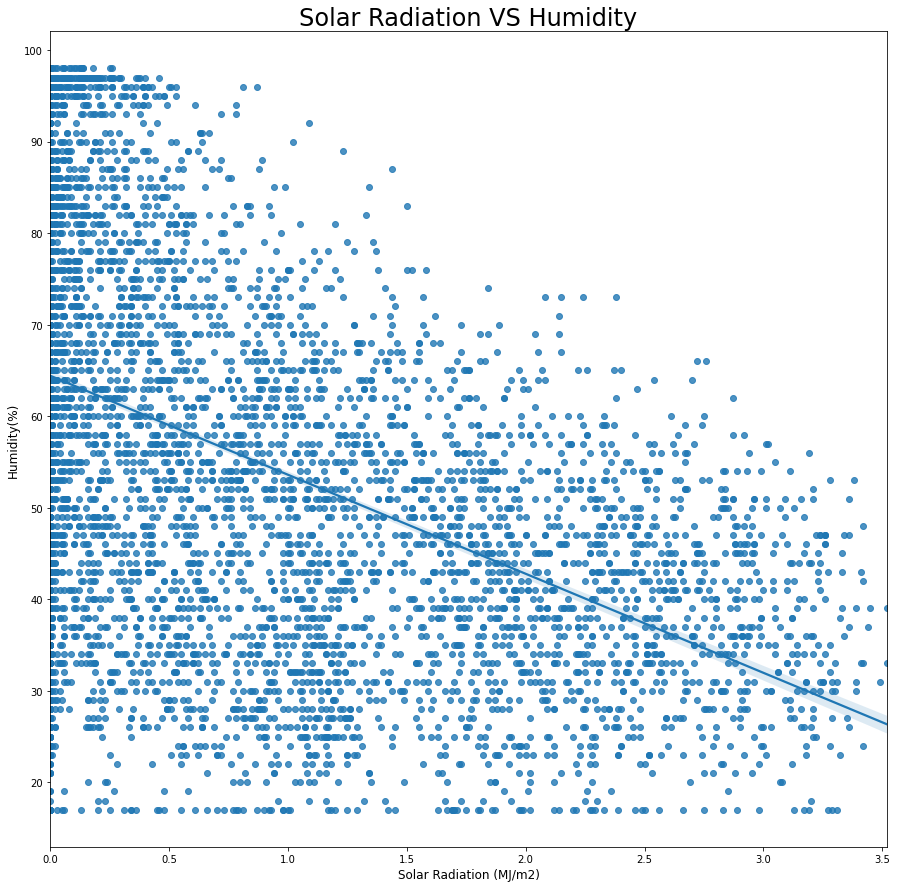

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.regplot('Solar Radiation (MJ/m2)', 'Humidity(%)', data=seoul_df)
plt.xlabel('Solar Radiation (MJ/m2)', fontsize='large')
plt.ylabel('Humidity(%)', fontsize='large')
ax.set_title( "Solar Radiation VS Humidity" , size = 24 )
fig.savefig('scatter plot 2.png')

**Feature Distribution:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

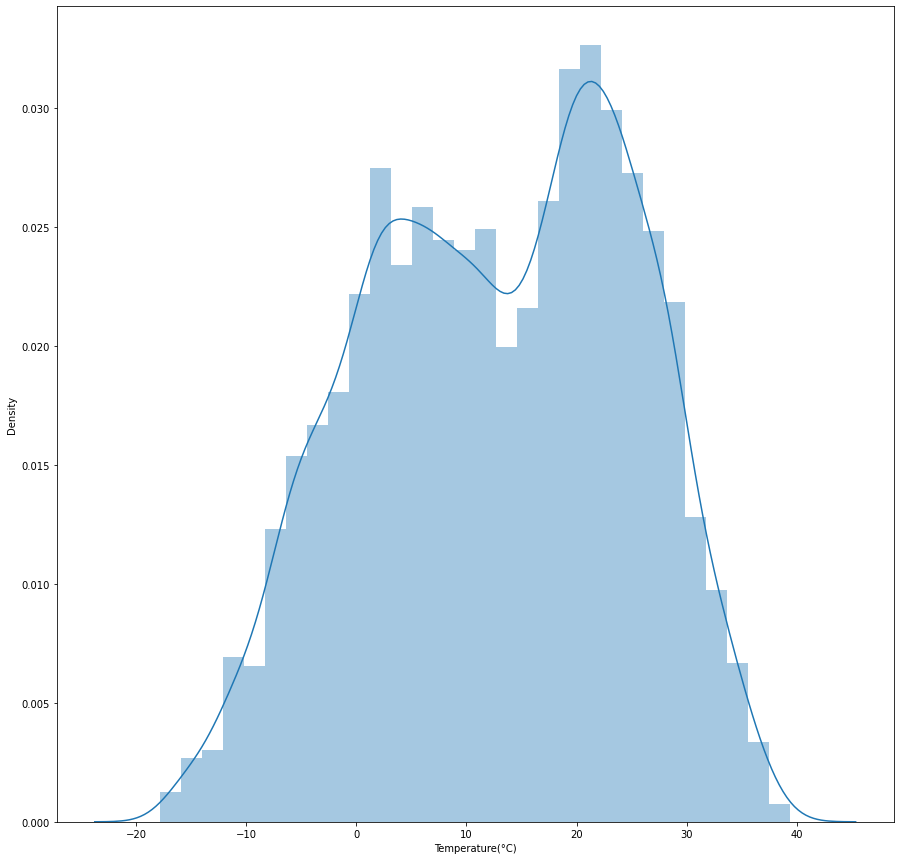

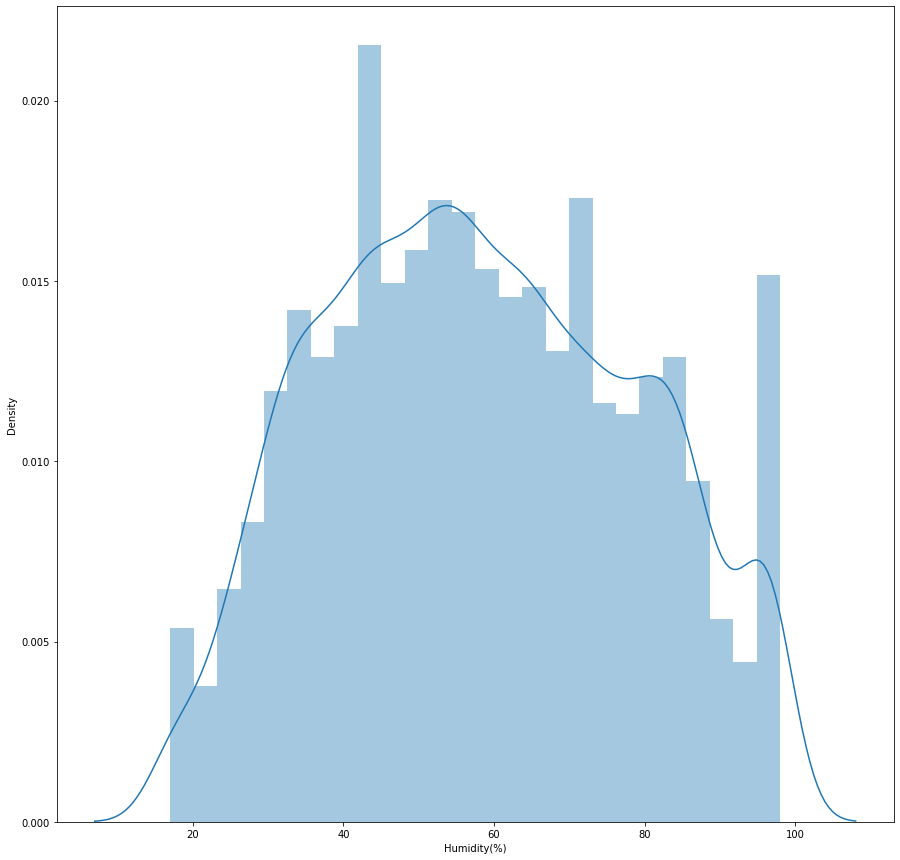

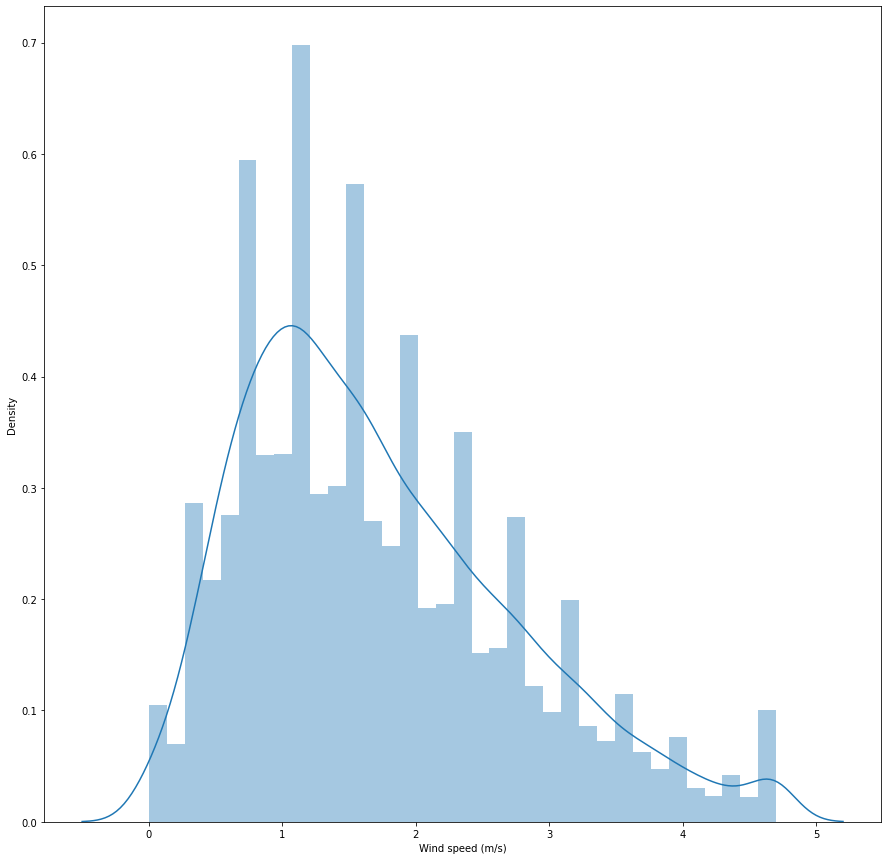

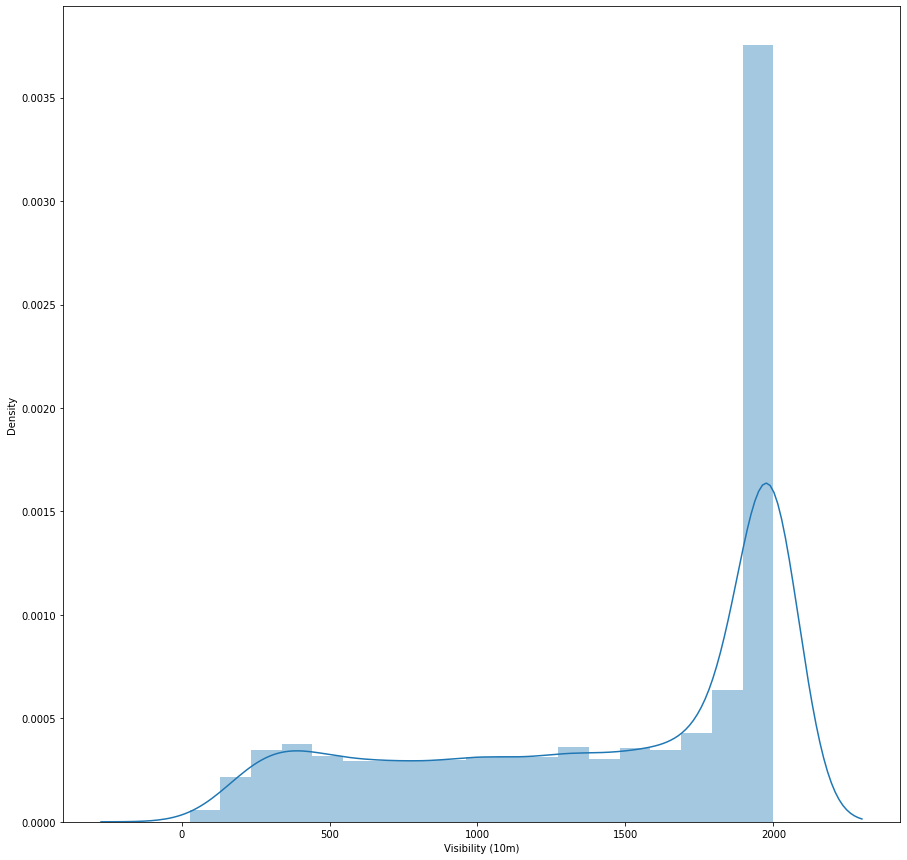

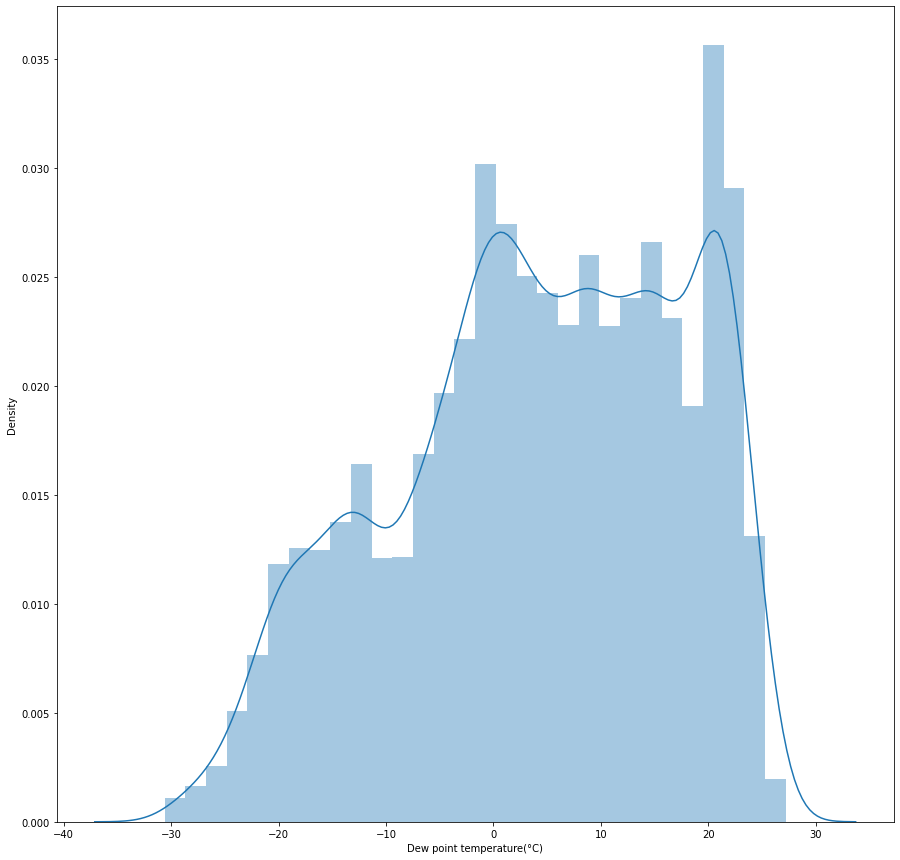

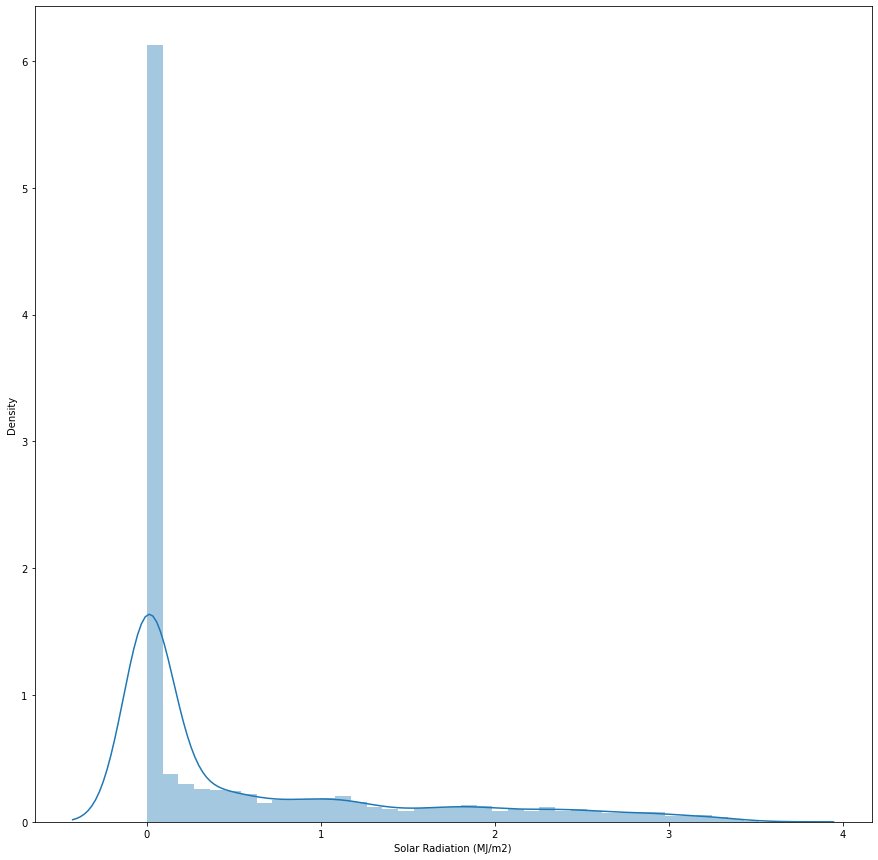

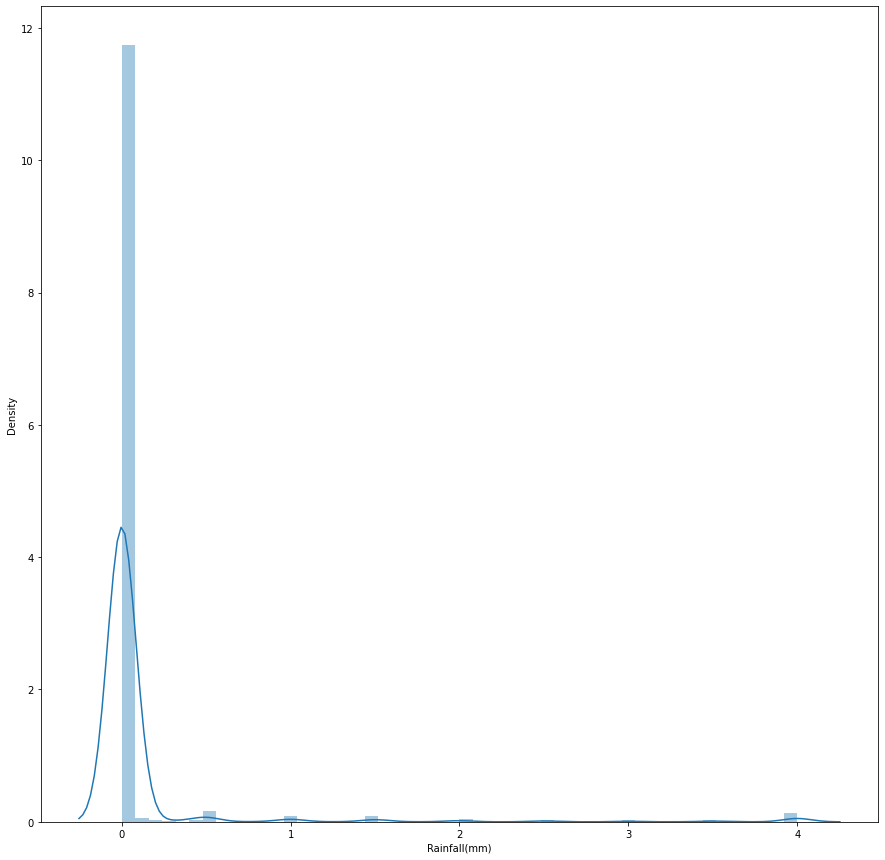

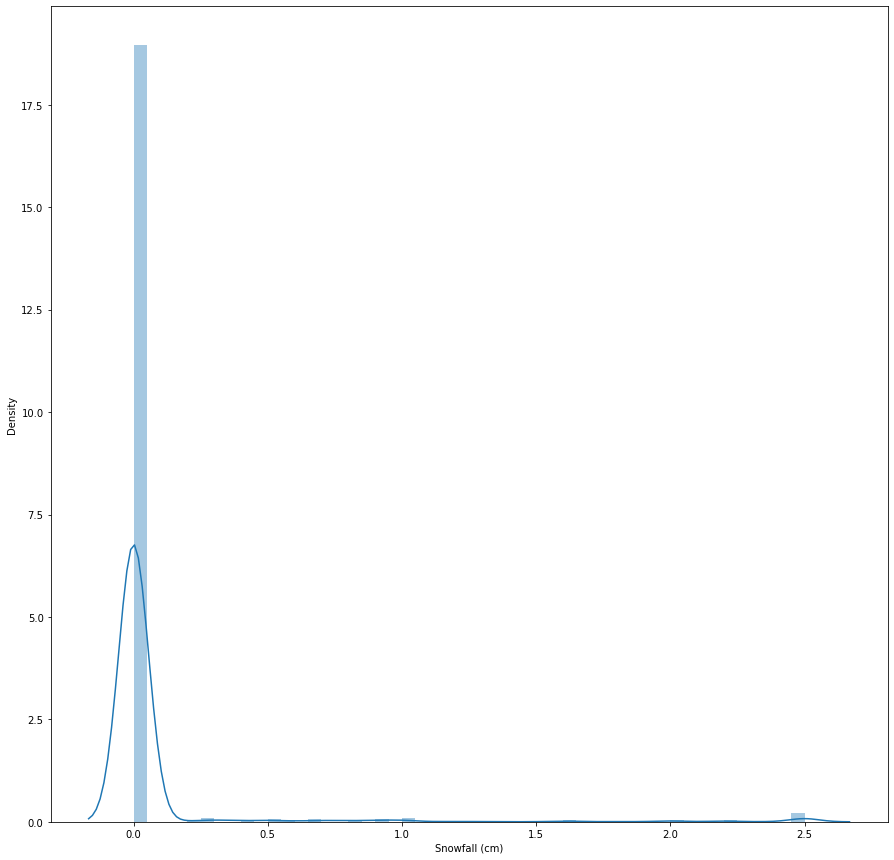

In [ ]:
numerical_features = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for col in numerical_features:
  fig, ax = plt.subplots(figsize = ( 15 , 15 ))
  sns.distplot(seoul_df1[col])

In [ ]:
seoul_df1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'week day'],
      dtype='object')

For categorical features we have first change the dtype of the instance from string to integre to do that here we are following One hot encoding method.



In [ ]:
seoul_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8465 non-null   int64   
 1   Hour                       8465 non-null   int64   
 2   Temperature(°C)            8465 non-null   float64 
 3   Humidity(%)                8465 non-null   int64   
 4   Wind speed (m/s)           8465 non-null   float64 
 5   Visibility (10m)           8465 non-null   int64   
 6   Dew point temperature(°C)  8465 non-null   float64 
 7   Solar Radiation (MJ/m2)    8465 non-null   float64 
 8   Rainfall(mm)               8465 non-null   float64 
 9   Snowfall (cm)              8465 non-null   float64 
 10  Seasons                    8465 non-null   object  
 11  Holiday                    8465 non-null   object  
 12  Functioning Day            8465 non-null   object  
 13  Month                      8465 n

In [ ]:
# changing dtype into category for the columns 'Month' and 'Weed day'
seoul_df1['Month'] = seoul_df1['Month'].astype('category')
seoul_df1['week day'] = seoul_df1['week day'].astype('category')

In [ ]:
seoul_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8465 non-null   object        
 1   Rented Bike Count          8465 non-null   int64         
 2   Hour                       8465 non-null   int64         
 3   Temperature(°C)            8465 non-null   float64       
 4   Humidity(%)                8465 non-null   int64         
 5   Wind speed (m/s)           8465 non-null   float64       
 6   Visibility (10m)           8465 non-null   int64         
 7   Dew point temperature(°C)  8465 non-null   float64       
 8   Solar Radiation (MJ/m2)    8465 non-null   float64       
 9   Rainfall(mm)               8465 non-null   float64       
 10  Snowfall (cm)              8465 non-null   float64       
 11  Seasons                    8465 non-null   object        
 12  Holida

In [ ]:
# create an new instance of dataset for process
seoul_df2 = seoul_df1.copy()

Here the features like Seasons, Holiday, Function Day, Month & Week Day are one hot encoded to make dummy variables.

In [ ]:
# One hot encoding
seoul_df2 = pd.get_dummies(seoul_df2, columns=[ 'Seasons','Holiday', 'Functioning Day', 'Month', 'week day'], prefix=["Seasons_indi", "Holiday_indi","Functioning Day_indi","Month_indi","week day_indi"])

In [ ]:
seoul_df2.head(3)

Rented Bike Count  Hour  ...  week day_indi_5  week day_indi_6
0                254     0  ...                0                0
1                204     1  ...                0                0
2                173     2  ...                0                0

[3 rows x 36 columns]

So far we done some feature exploration, feature transformation and new feature creation. Now we can feed our dataset into the model

In [ ]:
seoul_df2.shape

(8465, 36)

**Baseline model:**

Here I choose Decision tree as my Baseline model and try to fit the information over it. Baseline model results becomes benchmark for choosing next complex models

In [ ]:
# independent variable
features = seoul_df2.columns.to_list()
features[1:]

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons_indi_Autumn',
 'Seasons_indi_Spring',
 'Seasons_indi_Summer',
 'Seasons_indi_Winter',
 'Holiday_indi_Holiday',
 'Holiday_indi_No Holiday',
 'Functioning Day_indi_Yes',
 'Month_indi_1',
 'Month_indi_2',
 'Month_indi_3',
 'Month_indi_4',
 'Month_indi_5',
 'Month_indi_6',
 'Month_indi_7',
 'Month_indi_8',
 'Month_indi_9',
 'Month_indi_10',
 'Month_indi_11',
 'Month_indi_12',
 'week day_indi_0',
 'week day_indi_1',
 'week day_indi_2',
 'week day_indi_3',
 'week day_indi_4',
 'week day_indi_5',
 'week day_indi_6']

In [ ]:
# dependent variable
dependent_variable = features[:1]
dependent_variable

['Rented Bike Count']

In [ ]:
# Create the data of independent variables
X = seoul_df2[features[1:]]

# Create the dependent variable data
y = seoul_df2[dependent_variable]

Here i done square root transformation to target variable, because it has high positive skewness, Our Decision tree will calculate variance with respect to target variable, if target variable distribution is skewed mean will get influenced, and our calculation of reduction in variance get affected


In [ ]:
#square root transformation  
y = np.sqrt(y)

In [ ]:
#  splitting train and hold out sample
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6772, 35)
(1693, 35)


In [ ]:
# check the training set proportion
(1693)/(6772+1693)

0.2

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
d_reg = DecisionTreeRegressor( max_leaf_nodes=50,max_depth=4, random_state=0)

In [ ]:
# fit the data to the model
d_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# model score
d_reg.score(X_train,y_train)

0.748799826160161

In [ ]:
# train set prediction
y_train_pred = d_reg.predict(X_train)

# test set prediction
y_test_pred = d_reg.predict(X_test)

**Metric:**

Here I choosen R2 Score and RMSE as a evaluation metric. Beacuse R2 score range between [-infinity, 1] its intuitive to interpret.

**R2 Score** is also known as Co-efficient of determination, this compare our model with baseline model and tells how better our model are.

**RMSE** - since MSE penalize the error heavily Root Mean Square Error is scaled down value of MSE

In [ ]:
# were here choosing MSE and R2 metric for our model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# RMSE for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

359.2134727828951

In [ ]:
# RMSE for  test prediction
RMSE_test =np.sqrt(mean_squared_error((y_test**2),(y_test_pred**2)))
RMSE_test

376.53300452522944

In [ ]:
# R2_train 
R2_train = r2_score((y_train**2), (y_train_pred**2))
R2_train

0.6907895788560938

In [ ]:
# R2_test
R2_test = r2_score((y_test**2), (y_test_pred**2))
R2_test

0.6392628706583963

In [ ]:
Decision_tree = {'Model':'Decision_tree','RMSE_train':359.2134727828951,'RMSE_test':376.53300452522944,'R2_train':0.6907895788560938,'R2_test':0.6392628706583963}

In [ ]:
metric = pd.DataFrame()

In [ ]:
metric = metric.append(Decision_tree,ignore_index=True)
metric

Model   R2_test  R2_train   RMSE_test  RMSE_train
0  Decision_tree  0.639263   0.69079  376.533005  359.213473

Our Baseline its not seems to be a good prediction, we have go deeper to increase our r2 score

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

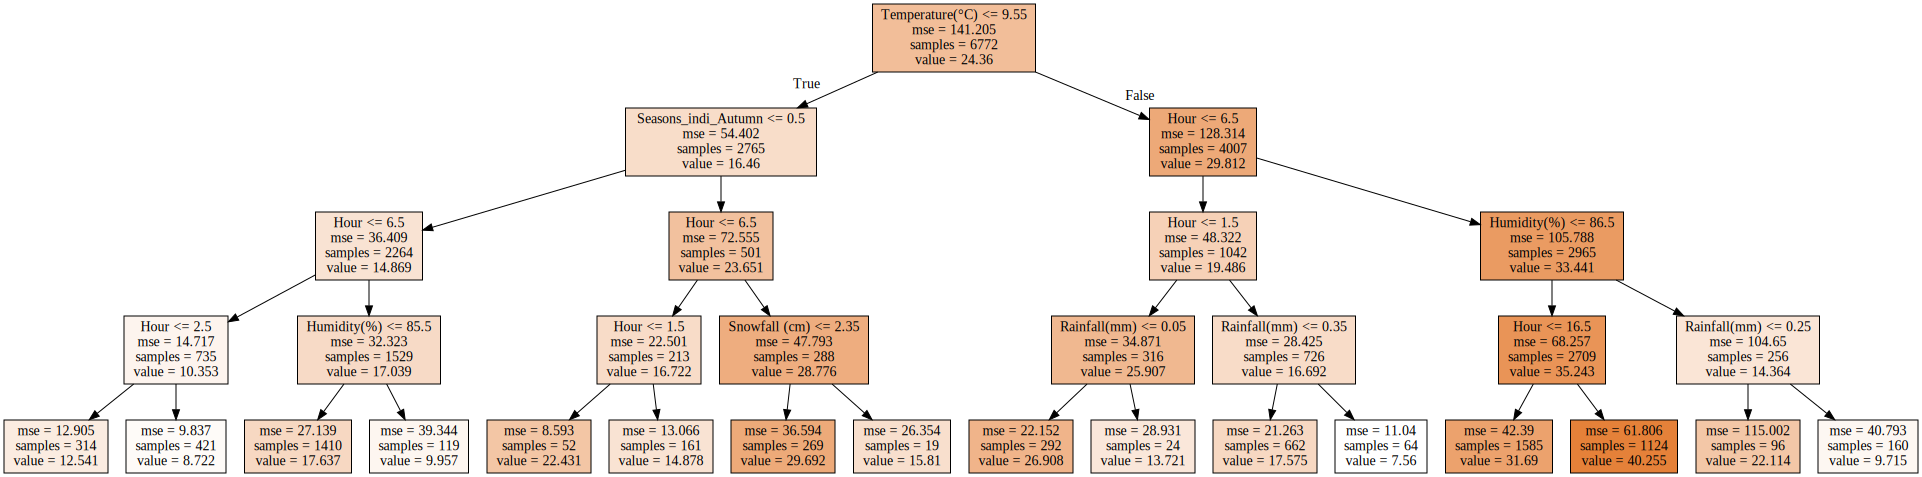

In [ ]:
graph = Source(tree.export_graphviz(d_reg, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

**Ensemble method**

our Baseline model have R2_train of 0.69. Since single decision tree is an greedy algorithm, we just checked how our data behaves to the model. Lets now check the ensembles methodes for further prediction accuracy.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

**Random Forest:**

  Random forest is an powerful predictive model in terms of Interpretability as a primal factor. For Champion model not only the accurate prediction is an criteria is it more important to understand and interpretability why some business decision had taken.

  As interpretability as concern Random Forest is an effective model untill we find an optimal hyperparametre to choose to get best fit. 

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100,criterion='mse',min_samples_split=50,bootstrap=True,warm_start=False,random_state=0,oob_score=True,min_samples_leaf=50)

**Parametre explanation:**


**n_estimator** - 100 (100 randomly uncorrelated dataset created from original dataset with replacement)



**criteria** - criteria selected for determining the reduction in variance of the node and feature selection where the split will happen.



**min_sample_split** = this parameter will reduces the chance of overfitting by controlling the growth of tree. Threshold value setted here is 50. In each tree will further grows when their parent node contains observation morethan 50.


**min_sample_leaf** - This thresholds minimum sample required to further split in parent. if less than threshold it become leaf.



**Bootstrap** = True, this allows the n_estimator tree will have randomly selected observation with replacement and controllig the feature. Otherwise it takes complete dataset and runs parallely



**warm state** = will uses previous error then it increases the n_estimators, this parametre makes no sense right. so here  i will not pursue with this.



**random_state** = will use for solution reproduciblity



**oob_score** = In built cross validation for random forest.

In [ ]:
random_forest.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# model score
random_forest.score(X_train,y_train)

0.8552799116141578

In [ ]:
# train prediction using random forest 
y_train_pred = random_forest.predict(X_train)

In [ ]:
# prediction using random forest 
y_test_pred = random_forest.predict(X_test)

In [ ]:
# error metric between train and train predict
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

259.2163834771222

In [ ]:
# error metric between test_prediction and y_actual
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

282.4629551842265

In [ ]:
# r2 score for train prediction and actuals
R2_train = r2_score((y_train**2),(y_train_pred**2))
R2_train

0.8389822393573358

In [ ]:
# r2 score for test prediction and actuals
R2_test = r2_score((y_test**2), (y_test_pred**2))
R2_test

0.7969945289485133

In [ ]:
Random_forest = {'Model':'Random_forest1','RMSE_train':259.2163834771222,'RMSE_test':282.4629551842265,'R2_train':0.8389822393573358,'R2_test':0.7969945289485133,'Tweak':'auto'}

In [ ]:
metric = metric.append(Random_forest,ignore_index=True)
metric

Model   R2_test  R2_train   RMSE_test  RMSE_train Tweak
0   Decision_tree  0.639263  0.690790  376.533005  359.213473   NaN
1  Random_forest1  0.796995  0.838982  282.462955  259.216383  auto

**Feature Importance:**

  In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

  In Regression task random forest useu Reduction in variance as factor to choose which feature that going to split. Higher the variance lesser the Homogenity. Feature which gives low variance that consider as important feature to split.

In [ ]:
# feature importance
random_forest.feature_importances_

array([3.48403565e-01, 4.12253533e-01, 9.10322108e-02, 3.00871416e-04,
       1.87337227e-03, 9.49239614e-03, 9.38311478e-03, 7.22913655e-02,
       2.95568606e-04, 4.26354894e-02, 5.01272153e-03, 6.50279492e-04,
       4.98385794e-03, 2.44021553e-04, 4.18604856e-04, 0.00000000e+00,
       3.19821090e-04, 4.38815595e-05, 0.00000000e+00, 0.00000000e+00,
       2.60040630e-05, 1.76420207e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.80597230e-04, 1.68381398e-05, 4.80558050e-05,
       0.00000000e+00, 0.00000000e+00, 5.51499474e-06, 4.47625572e-06,
       8.89630331e-06, 1.12683987e-05, 4.60323274e-05])

**Feature Importance:**

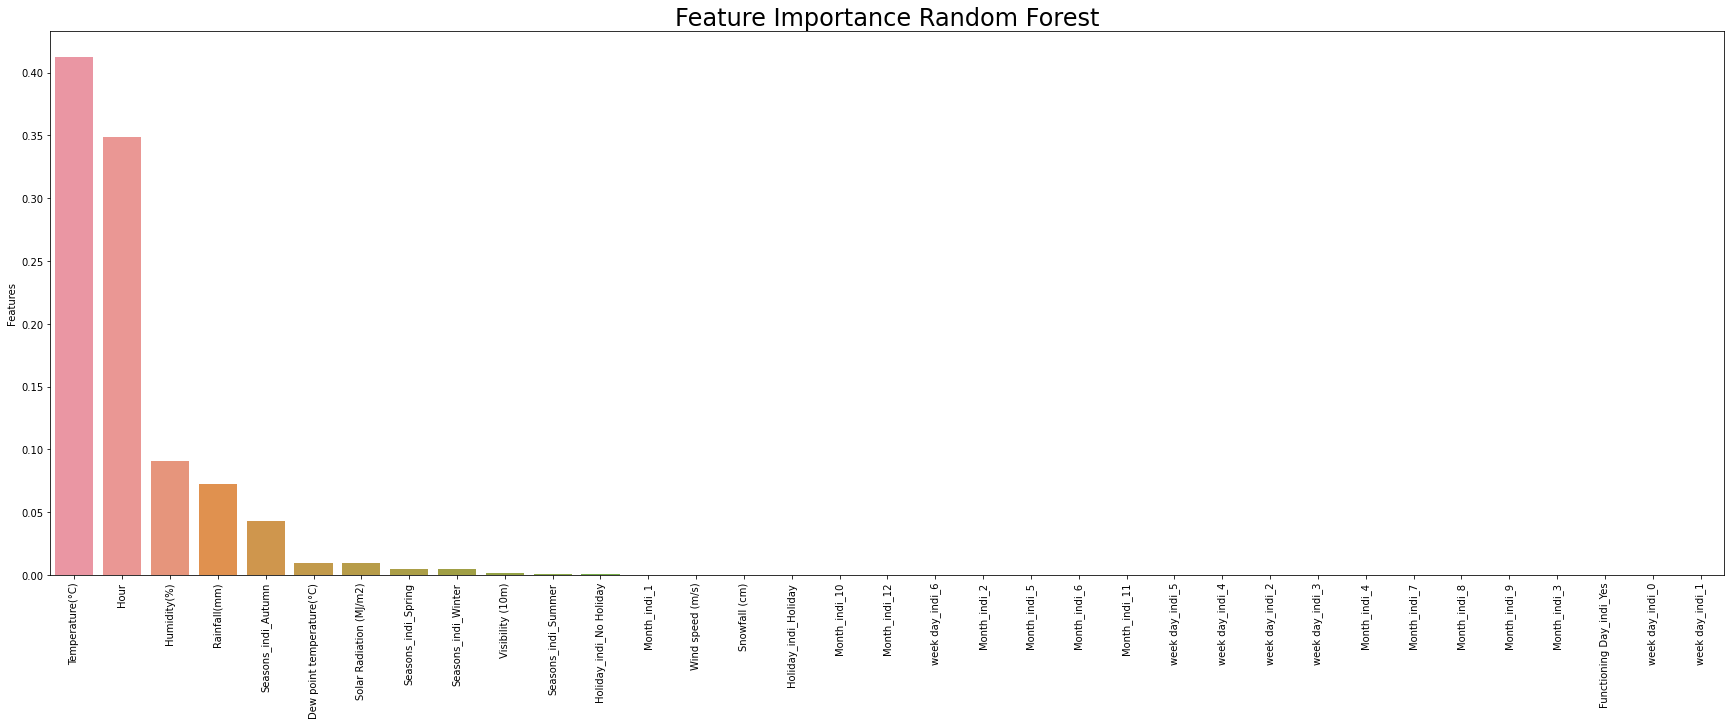

In [ ]:
# Feature Importance plot
dictionary = dict(zip(X_train.columns.to_list(), list(random_forest.feature_importances_)))
your_df_from_dict=pd.DataFrame.from_dict(dictionary,orient='index')

your_df_from_dict.sort_values(by=0,ascending=False,inplace=True)
your_df_from_dict.rename(columns= {0 :'Features'},inplace=True)

fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.barplot(x=your_df_from_dict.index, y='Features', data=your_df_from_dict)
ax.set_title( "Feature Importance Random Forest" , size = 24 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('Feature Importance 2.png')

**Trial 2 Random Forest: with feature selection sqrt**

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100,criterion='mse',min_samples_split=50,bootstrap=True,warm_start=False,random_state=0,oob_score=True,max_features='sqrt',min_samples_leaf=50)

**Parameter Explanation:**

**max_feature** = "sqrt", After completion of every tree, model resamples the feature from original dataset. For instance we are having 100 feature,our model selects 10 features. Created uncorrelated dataset, and chance of getting split by each feature is high.

By holding all other parametres unchanged.

In [ ]:
random_forest.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# model score
random_forest.score(X_train,y_train)

0.7769044422962841

In [ ]:
# train predictions using trial 2 random forest
y_train_pred = random_forest.predict(X_train)

In [ ]:
# prediction using trial 2 random forest
y_test_pred = random_forest.predict(X_test)

In [ ]:
# RMSE metric between train and train predict
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

338.5993086285945

In [ ]:
# RMSE metric between test_prediction and y_actual
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

336.6657353038248

In [ ]:
# R2 SCORE FOR TRAIN PREDICTION
R2_train = r2_score((y_train**2),(y_train_pred**2))
R2_train

0.7252605515229016

In [ ]:
# R2 SCORE FOR TRAIN PREDICTION
R2_test = r2_score((y_test**2), (y_test_pred**2))
R2_test

0.7116084171353882

In [ ]:
random_forest.feature_importances_

array([2.30584613e-01, 2.19090766e-01, 8.80314507e-02, 1.69135708e-02,
       2.99875032e-02, 8.51664953e-02, 6.74165311e-02, 4.55166196e-02,
       1.14939209e-02, 1.21556408e-02, 5.85024094e-03, 2.28238097e-02,
       1.35619896e-01, 7.29128176e-04, 4.85415947e-04, 0.00000000e+00,
       8.16223522e-03, 2.05701078e-03, 1.49485186e-03, 3.55014534e-04,
       1.27243580e-03, 2.75319155e-03, 4.91140125e-04, 4.99696010e-04,
       3.65734007e-04, 1.30877959e-03, 2.96881034e-03, 3.74146396e-03,
       5.15768684e-04, 1.90171171e-04, 1.18415250e-04, 1.85767327e-04,
       2.01182292e-04, 5.84706835e-04, 8.68022742e-04])

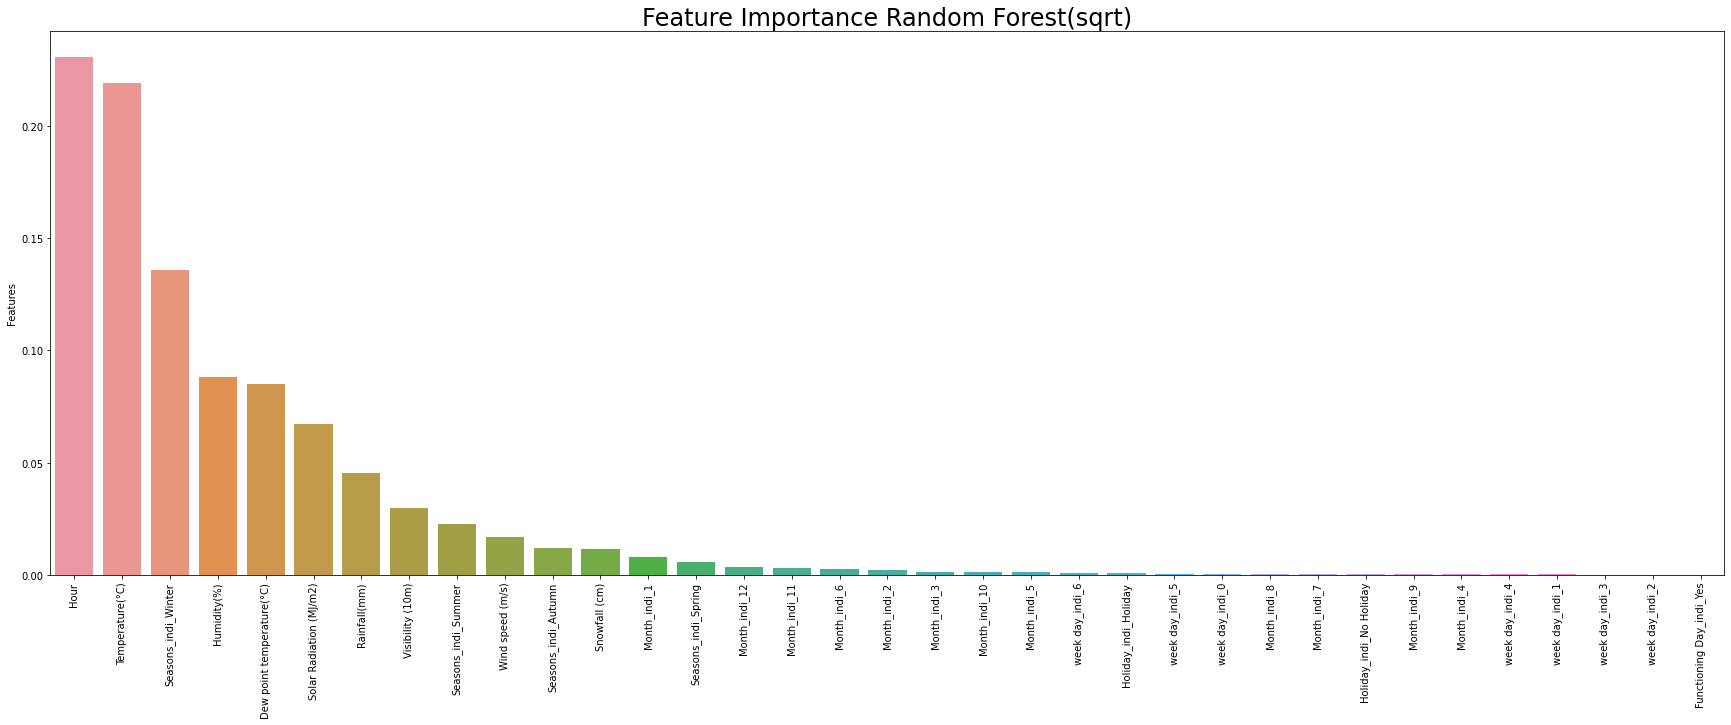

In [ ]:
# Feature Importance plot
dictionary = dict(zip(X_train.columns.to_list(), list(random_forest.feature_importances_)))
your_df_from_dict=pd.DataFrame.from_dict(dictionary,orient='index')

your_df_from_dict.sort_values(by=0,ascending=False,inplace=True)
your_df_from_dict.rename(columns= {0 :'Features'},inplace=True)

fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.barplot(x=your_df_from_dict.index, y='Features', data=your_df_from_dict)
ax.set_title( "Feature Importance Random Forest(sqrt)" , size = 24 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('Feature Importance 3.png')

As we seen, numbers features that got solit is increased in second model, Importance of Temprature & Hour bit reduced and other features like Season_indi_winter, Humidity, Dew point temprature got increased comparatively. Since its came at the cost of huge reduction in R2 score but the distance between R2_train and R2_test is very minimal.

In [ ]:
Random_forest2 = {'Model':'Random_forest2','RMSE_train':338.5993086285945,'RMSE_test':336.6657353038248,'R2_train':0.7252605515229016,'R2_test':0.7116084171353882,'Tweak': 'feature_sqrt'}

In [ ]:
metric = metric.append(Random_forest2,ignore_index=True)
metric

Model   R2_test  R2_train   RMSE_test  RMSE_train         Tweak
0   Decision_tree  0.639263  0.690790  376.533005  359.213473           NaN
1  Random_forest1  0.796995  0.838982  282.462955  259.216383          auto
2  Random_forest2  0.711608  0.725261  336.665735  338.599309  feature_sqrt

**Selected only important Feature:**

As we seen above there are 37 features in our dataset but our model concern only on few features and repeated split happens over and over again on same features. So by the intention to make our model easy interpretation we are intent to pick important features and run our model. 

Compare the R2 score of the ‘full featured’Regressor to the Score of the ‘limited featured’ Regressor

This has three benefits. 
  
  we make our model more simple to interpret. 
  
  we can reduce the variance of the model.
  
  Overfitting.

  Computational Cost to train the model.

From sklearn library i import select from model there we can fix the threshold, here iam keeping default it takes mean of Feature importance as threshold.

In [ ]:
# import model 
from sklearn.feature_selection import SelectFromModel

In [ ]:
# original Features
len(X_train.columns)

35

In [ ]:
# apply to base estimator
sel = SelectFromModel(RandomForestRegressor(n_estimators=100,criterion='mse',min_samples_split=50,bootstrap=True,warm_start=False,random_state=0,oob_score=True,max_features='sqrt',min_samples_leaf=50))
sel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='sqrt',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=50,
                                                min_samples_split=50,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=True, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None,

In [ ]:
# Important features
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

8

In [ ]:
# list of important features
list(selected_feat)

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Seasons_indi_Winter']

In [ ]:
# Create the data of independent variables
X = seoul_df2[list(selected_feat)]

# Create the dependent variable data
y = seoul_df2[dependent_variable]

In [ ]:
# sqrt transformation for dependent variable
y = np.sqrt(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6772, 8)
(1693, 8)


In [ ]:
# fit the random random forest model
random_forest = RandomForestRegressor(n_estimators=100,criterion='mse',min_samples_split=50,bootstrap=True,warm_start=False,random_state=0,oob_score=True,max_features='auto')

In [ ]:
random_forest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# train prediction using important feature random forest
y_train_pred = random_forest.predict(X_train)

In [ ]:
# test prediction using important feature random forest
y_test_pred = random_forest.predict(X_test)

In [ ]:
# RMSE metric between train and train predict
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

222.41360071070417

In [ ]:
# RMSE metric between train and train predict
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

260.653927981029

In [ ]:
# r2 score for train prediction
R2_train = r2_score((y_train**2),(y_train_pred**2))
R2_train

0.8814581856159296

In [ ]:
# r2 score for test prediction
R2_test = r2_score((y_test**2),(y_test_pred**2))
R2_test

0.8271325230135056

In [ ]:
Random_forest3 = {'Model':'Random_forest3','RMSE_train':222.41360071070417,'RMSE_test':260.653927981029,'R2_train':0.8814581856159296,'R2_test':0.8271325230135056,'Tweak': 'only_important_feature'}

In [ ]:
metric = metric.append(Random_forest3,ignore_index=True)
metric

Model   R2_test  ...  RMSE_train                   Tweak
0   Decision_tree  0.639263  ...  359.213473                     NaN
1  Random_forest1  0.796995  ...  259.216383                    auto
2  Random_forest2  0.711608  ...  338.599309            feature_sqrt
3  Random_forest3  0.827133  ...  222.413601  only_important_feature

[4 rows x 6 columns]

**Cross validation:**

---



Cross validaation has only parametre k, in our case k=5, datasets splits into 5 folds resampling procedure used to evaluate machine learning models on a limited data sample.


Grid search created the parametre combination space, and will do exhaustive search over and over in model with different combination. And we can get the optimal model

Goal of GridsearchCV is not to find optimal parametre, the goal is to get optimal model that can fit with our data

In [ ]:
random_forest_validation =  RandomForestRegressor(bootstrap=True,warm_start=False,random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

Parametre defined for cross validation

In [ ]:
# parametre to cross validate
param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [200,300,400,500]
  }

validate through GridsearchCV

In [ ]:
# created instance of random forest with cross validation
random_forest_validation = GridSearchCV(estimator=random_forest_validation,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2, scoring='r2')

fit the object with our Train set Data

In [ ]:
# fit cross validation with train
random_forest_validation.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   2.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   2.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   2.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   2.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   2.7s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.0s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   2.7s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   2.6s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   3.2s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   3.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   1.8s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   3.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   3.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   3.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   3.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   3.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   4.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.6s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.7s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.5s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.4s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.3s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.2s
[CV] max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.1s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   3.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   3.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   3.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   3.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=300, total=   3.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   4.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   4.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   4.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   4.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=400, total=   4.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   5.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   5.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   4.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   4.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=500, total=   5.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=500, total=   4.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.8s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.8s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=400, total=   3.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.6s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.7s
[CV] max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=500, total=   4.7s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   2.0s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=400, total=   3.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total=   4.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=200, total=   1.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.9s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=300, total=   2.8s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.7s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.7s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.7s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.7s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=400, total=   3.7s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.6s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.6s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.6s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.6s
[CV] max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=500, total=   4.6s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 17.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
# random forest cv score
random_forest_validation.score(X_train,y_train)

0.8504427728127716

In [ ]:
# train prediction using random forest cv
y_train_pred = random_forest_validation.predict(X_train)

In [ ]:
# test prediction using random forest cv
y_test_pred = random_forest_validation.predict(X_test)

In [ ]:
# RMSE metric between train and train predict
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

266.7381449627122

In [ ]:
# RMSE metric between train and train predict
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

289.29448789023945

In [ ]:
# r2 score for train prediction
R2_train = r2_score((y_train**2),(y_train_pred**2))
R2_train

0.8295020580192314

In [ ]:
# r2 score for test prediction
R2_test = r2_score((y_test**2),(y_test_pred**2))
R2_test

0.7870561689489876

In [ ]:
random_forest_validation.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [ ]:
Random_forestCV = {'Model':'Random_forestCV','RMSE_train':255.43394396328992,'RMSE_test':279.87829197247834,'R2_train':0.843647040484136,'R2_test':0.8006927140667528,'Tweak': 'CV-5'}

In [ ]:
metric = metric.append(Random_forestCV,ignore_index=True)
metric

Model   R2_test  ...  RMSE_train                   Tweak
0    Decision_tree  0.639263  ...  359.213473                     NaN
1   Random_forest1  0.796995  ...  259.216383                    auto
2   Random_forest2  0.711608  ...  338.599309            feature_sqrt
3   Random_forest3  0.827133  ...  222.413601  only_important_feature
4  Random_forestCV  0.800693  ...  255.433944                    CV-5

[5 rows x 6 columns]

Here Distance metric created (Distance) = R2_train - R2_test

In [ ]:
metric['Distance'] = (metric['R2_train'] - metric['R2_test']) * 100
metric

Model   R2_test  ...                   Tweak  Distance
0    Decision_tree  0.639263  ...                     NaN  5.152671
1   Random_forest1  0.796995  ...                    auto  4.198771
2   Random_forest2  0.711608  ...            feature_sqrt  1.365213
3   Random_forest3  0.827133  ...  only_important_feature  5.432566
4  Random_forestCV  0.800693  ...                    CV-5  4.295433

[5 rows x 7 columns]

In [ ]:
random_forest_validation.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Steps to minimizes the model Error:



*   Hyperparametre Tunning
*   Add more Information

*   Change the model

Here we tried the first step, second by adding more information its constrain for us we have work around with available data only and finally try different model.

So next i am choosing XGBoost regressor





**XGBoost:**

  XGBoost is Sophisticated version of Gradient boosting machine, build in a framework of Gradient Descent and Boosting happens by sequentially building decision tree on bootstraped datasets. Here new tree will start to build after the end of previous one. This makes this Algo to less computational.

  It team up many weak learner and produces the strong learner.
  
  Xgb has so many parametres which are not available in random forest. Here some can controls inside the tree and across the tree.

  Xgb has inbuilt feature to handle missing values.

  Since its non parametric algorithm, it supports Regularization.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

**Gridsearch for XGBoost**

In [ ]:
# Redefine Baseline model for XGBoost
xgb_model = XGBRegressor(n_estimators=1000,random_state=0)

In [ ]:
# Gridsearch parametre dict_
param_dict_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

**Parametre Explanation:**

**Learning rate** - Xgboost too uses decision tree, New trees are created to correct the residual errors in the predictions from the existing sequence of trees.

The effect is that the model can quickly fit, then overfit the training dataset.

By make model optimaal we slow down the learning .


In [ ]:
# lets apply defined paranetre dict_ into the model by keeping other parametres same
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=2, scoring='r2')

xgb_grid.fit(X_train,y_train)

In [ ]:
# Check the best parametres from CV
xgb_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 180}

In [ ]:
# Cross validation score
xgb_grid.score(X_train,y_train)

0.997751563258648

In [ ]:
# predicting train data using optimal model 
y_train_pred_xb = xgb_grid.predict(X_train)

In [ ]:
# predicting test data using optimal model 
y_test_pred_xb = xgb_grid.predict(X_test)

In [ ]:
# calculating rmse for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred_xb**2)))
RMSE_train

189.3970092598576

In [ ]:
# calculating rmse for test prediction
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred_xb**2)))
RMSE_test

251.09670409010573

In [ ]:
# calculating r2 square for train data prediction
R2_train = r2_score((y_train**2), (y_train_pred_xb**2))
R2_train

0.9140402543512876

In [ ]:
# calculating r2 square for test data prediction
R2_test = r2_score((y_test**2), (y_test_pred_xb**2))
R2_test

0.8395769496933985

In [ ]:
xgb_metric = pd.DataFrame()

In [ ]:
xgboost = {'Model':'xbgoostcv','RMSE_train':189.3970092598576,'RMSE_test':251.09670409010573,'R2_train':0.9140402543512876,'R2_test':0.8395769496933985,'tweak':'CV-5','learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 180}

In [ ]:
xgb_metric = xgb_metric.append(xgboost,ignore_index=True)
xgb_metric

Model   R2_test  R2_train  ...  max_depth  n_estimators  tweak
0  xbgoostcv  0.839577   0.91404  ...        6.0         180.0   CV-5

[1 rows x 9 columns]

Here the R2 Score for train & test distance is pretty high, so lets make conserve our parametres and run Gridsearch one again  with conserved Parametres.

In [ ]:
# reduce the range of parametric space
param_dict_xgb = {
    'max_depth':[4,5,6],
    'n_estimators': [50,100,150],
    'learning_rate': [0.1, 0.05, 0.01]
  }

In [ ]:
# fit the model
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=2, scoring='r2')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.1, max_depth=4, n_estimators=50 .................
[10:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=4, n_estimators=50, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=50 .................
[10:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=50, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=50 .................
[10:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=4, n_estimators=50, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=50 .................
[10:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=4, n_estimators=50, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=50 .................
[10:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=4, n_estimators=50, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100 ................
[10:24:24] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   52.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [4, 5, 6],
                     

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 150}

In [ ]:
# predicting train data using optimal model 
y_train_pred_xb = xgb_grid.predict(X_train)

In [ ]:
# predicting test data using optimal model 
y_test_pred_xb = xgb_grid.predict(X_test)

In [ ]:
# calculating rmse for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred_xb**2)))
RMSE_train

194.55158496091414

In [ ]:
# calculating rmse for test prediction
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred_xb**2)))
RMSE_test

251.30753265043373

In [ ]:
# calculating r2 square for train data prediction
R2_train = r2_score((y_train**2), (y_train_pred_xb**2))
R2_train

0.909297671877538

In [ ]:
# calculating r2 square for test data prediction
R2_test = r2_score((y_test**2), (y_test_pred_xb**2))
R2_test

0.8393074442870214

In [ ]:
xgboost2 = {'Model':'XGBoostcv2','RMSE_train':194.55158496091414,'RMSE_test':251.30753265043373,'R2_train':0.909297671877538,'R2_test':0.8393074442870214,'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 150,'tweak':'CV-5'}

In [ ]:
xgb_metric = xgb_metric.append(xgboost2,ignore_index=True)
xgb_metric

Model   R2_test  R2_train  ...  max_depth  n_estimators  tweak
0   xbgoostcv  0.839577  0.914040  ...        6.0         180.0   CV-5
1  XGBoostcv2  0.839307  0.909298  ...        6.0         150.0   CV-5

[2 rows x 9 columns]

Since XGBoost is an pwerfull tool to predictive model but to get efficient results from it, we need to find the optimal hyperparametres to make optimal model.

Parametres in XGBoost majorly classified into two forms, one set fix the character of model another deals with behaviour of the model.

We can made dictionary with range of parametres and check through gridsearch, but it is heavily computationl. And cant feel how the model characters behave with different parametre.

So here we are using search individual range of parametre. In each search we able to optimul individual parametre. Atlast we can get set of optimal parametres.

**Baseline:**

Lets use the best parametre that obtained above to run a First xgboost model 

"learning_rate" = 0.05,

"max_depth" = 6

By keeping remaining parametres untouched


In [ ]:
xgb1 = XGBRegressor(
 learning_rate =0.05,
 n_estimators=150,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=1,
 colsample_bytree=1,
 objective= 'reg:linear',
 nthread=4,
 seed=27,)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6772, 35)
(1693, 35)


In [ ]:
xgb1.fit(X_train,y_train)

[15:17:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# score of Baseline model
xgb1.score(X_train,y_train)

0.953235412412422

In [ ]:
# predict train values
y_train_pred = xgb1.predict(X_train)

In [ ]:
# predict test values
y_test_pred = xgb1.predict(X_test)

In [ ]:
# calculating rmse for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

152.50106680027244

In [ ]:
# calculating rmse for test prediction
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

210.1075403389319

In [ ]:
# calculating r2 square for train data prediction
R2_train = r2_score((y_train**2), (y_train_pred**2))
R2_train

0.9442692802948416

In [ ]:
# calculating r2 square for test data prediction
R2_test = r2_score((y_test**2), (y_test_pred**2))
R2_test

0.8876771737028243

In [ ]:
xgboost3 = {'Model':'XGBoost1','RMSE_train':152.50106680027244,'RMSE_test':210.1075403389319,'R2_train':0.9442692802948416,'R2_test':0.8876771737028243,'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 150}

In [ ]:
xgb_metric = xgb_metric.append(xgboost3,ignore_index=True)
xgb_metric

Model   R2_test  R2_train  ...  max_depth  n_estimators  tweak
0   xbgoostcv  0.839577  0.914040  ...        6.0         180.0   CV-5
1  XGBoostcv2  0.839307  0.909298  ...        6.0         150.0   CV-5
2    XGBoost1  0.887677  0.944269  ...        6.0         150.0    NaN

[3 rows x 9 columns]

Feature importance of base model

In [ ]:
xgb1.feature_importances_

array([0.08045889, 0.14348237, 0.06248002, 0.00340494, 0.00371134,
       0.01033907, 0.0234616 , 0.10799123, 0.01967345, 0.21737699,
       0.0287163 , 0.0095342 , 0.16349304, 0.01197882, 0.        ,
       0.        , 0.00654894, 0.00217724, 0.0090889 , 0.00659945,
       0.00578874, 0.0081258 , 0.00344432, 0.00751873, 0.00722461,
       0.00460111, 0.00284324, 0.00289702, 0.00499137, 0.00421329,
       0.00372302, 0.00442178, 0.00400759, 0.01315662, 0.01252591],
      dtype=float32)

In [ ]:
your_df_from_dict.head(3)

Features
Seasons_indi_Winter  0.259614
Rainfall(mm)         0.158596
Seasons_indi_Autumn  0.108822

In [ ]:
your_df_from_dict.columns

RangeIndex(start=0, stop=1, step=1)

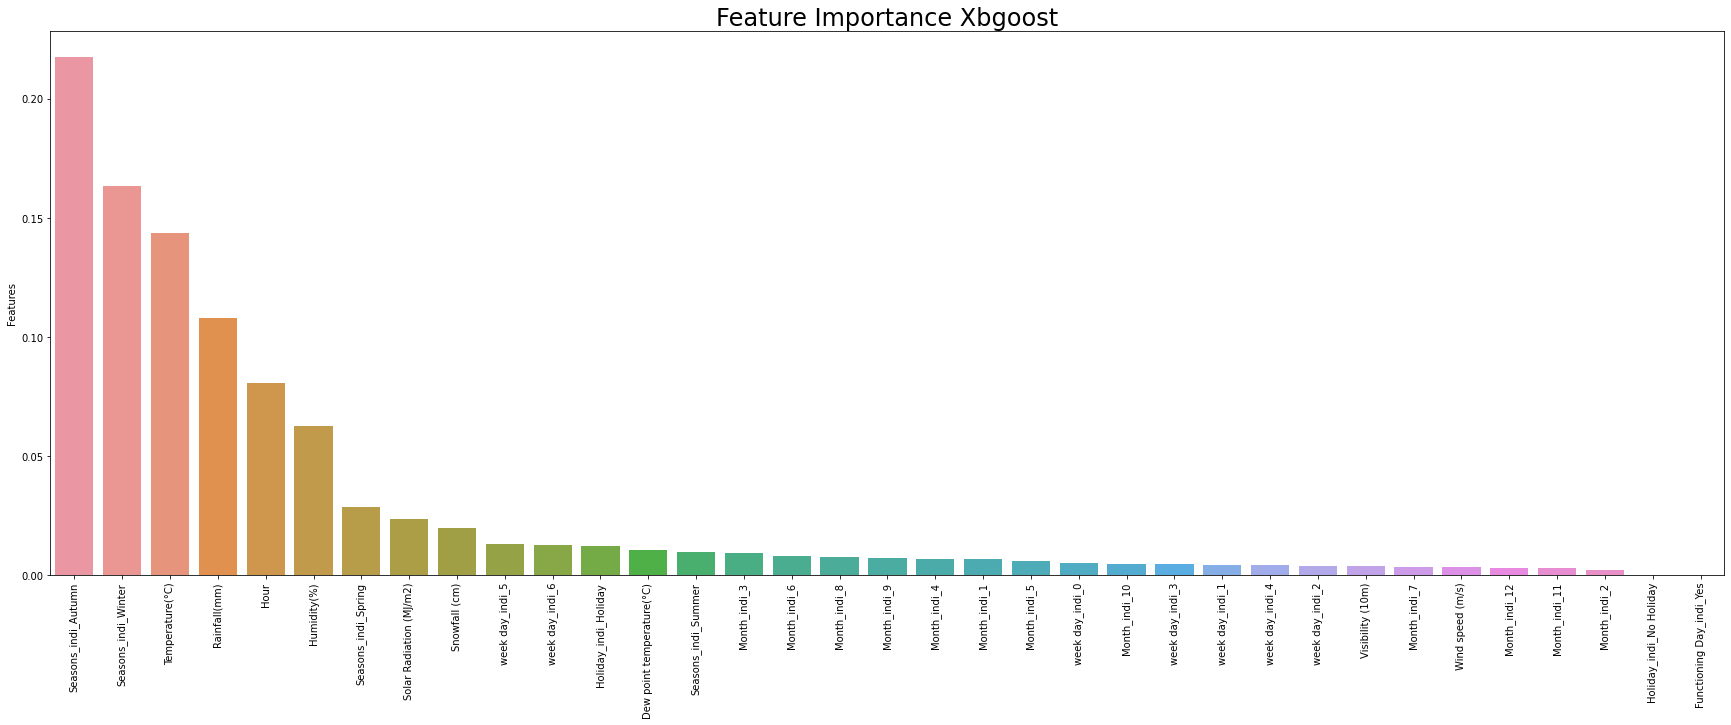

In [ ]:
# Feature Importance plot
dictionary = dict(zip(X_train.columns.to_list(), list(xgb1.feature_importances_)))
your_df_from_dict=pd.DataFrame.from_dict(dictionary,orient='index')

your_df_from_dict.sort_values(by=0,ascending=False,inplace=True)
your_df_from_dict.rename(columns= {0 :'Features'},inplace=True)

fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.barplot(x=your_df_from_dict.index, y='Features', data=your_df_from_dict)
ax.set_title( "Feature Importance Xbgoost" , size = 24 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('Feature Importance 4.png')

Xgboost performs preety well with so far obtained values, lets use some other range of parametres by expecting the better model performance

lets tweek some characters and Behaviour of the model

**1). Minimum _child_weight:**

next we initaite gridsearch for min_child_weight as approximate equals parametre like min_sample_leaf in Random forest. But its somewhat different from that.


Higher the value more conserve our tree


In [ ]:
# range of two parametres 
param_test1 = {
 'min_child_weight':range(5,10)
}

In [ ]:
# cross validation instance created
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.05, n_estimators=150,
  gamma=0, subsample=1, colsample_bytree=1,
 objective= 'reg:linear', nthread=4,seed=27,max_depth=6), 
 param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)

In [ ]:
# fit the model with train set data
gsearch2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[16:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=1, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=4,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4, param_grid={'min_child_weight': range(5, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r

In [ ]:
gsearch2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=7, missing=None, n_estimators=150,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# score
gsearch2.score(X_train,y_train)

0.9496645628396758

In [ ]:
# train prediction using model
y_train_pred = gsearch2.predict(X_train)

In [ ]:
# test prediction using model
y_test_pred = gsearch2.predict(X_test)

In [ ]:
# calculating rmse for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

158.17832758649362

In [ ]:
# calculating rmse for train prediction
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

210.4219131195624

In [ ]:
# r2 score for train prediction
R2_train = r2_score((y_train**2), (y_train_pred**2))
R2_train

0.9400425923801273

In [ ]:
# r2 score for test prediction
R2_test = r2_score((y_test**2), (y_test_pred**2))
R2_test

0.887340796851784

In [ ]:
# besr parametre
gsearch2.best_params_

{'min_child_weight': 7}

In [ ]:
xgboost4 = {'Model':'XGBoost2','RMSE_train':158.17832758649362,'RMSE_test':210.4219131195624,'R2_train':0.9400425923801273,'R2_test':0.887340796851784,'max_depth': 6, 'min_child_weight': 7,'tweak':"CV-5"}

In [ ]:
xgb_metric = xgb_metric.append(xgboost4,ignore_index=True)
xgb_metric

Model   R2_test  R2_train  ...  n_estimators  tweak  min_child_weight
0   xbgoostcv  0.839577  0.914040  ...         180.0   CV-5               NaN
1  XGBoostcv2  0.839307  0.909298  ...         150.0   CV-5               NaN
2    XGBoost1  0.887677  0.944269  ...         150.0    NaN               NaN
3    XGBoost2  0.887341  0.940043  ...           NaN   CV-5               7.0

[4 rows x 10 columns]

**2). TUNE GAMMA:**

What is gamma?

  Gamma is an Booster Parametre, Node will split only the reduction gives positive results in Loss function. Higher the Gamma, tree growth will be more conserve. Gamma value frames between [0,infinity]. I came about to read 20 is higher value for gamma. So we pass list of Gamma values into the model then we pick the best suited regularized gamma value.

In [ ]:
#  set of gamma values
param_test3 = {'gamma':[0,1,2,3,4,5]}

In [ ]:
# create gridsearch instance
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.05, n_estimators=150,
 subsample=1, colsample_bytree=1,booster='gbtree', nthread=4,seed=27,max_depth=6,min_child_weight=7), 
 param_grid = param_test3, scoring='r2',n_jobs=4,iid=False, cv=5)

In [ ]:
# fit the model
gsearch2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[16:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=7, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=4,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4, param_grid={'gamma': [0, 1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', v

In [ ]:
gsearch2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=7, missing=None, n_estimators=150,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# train prediction
y_train_pred = gsearch2.predict(X_train)

In [ ]:
# test prediction
y_test_pred = gsearch2.predict(X_test)

In [ ]:
# calculating rmse for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

158.17832758649362

In [ ]:
# calculating rmse for train prediction
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

210.4219131195624

In [ ]:
# r2 score for train prediction
R2_train = r2_score((y_train**2), (y_train_pred**2))
R2_train

0.9400425923801273

In [ ]:
# r2 score for test prediction
R2_test = r2_score((y_test**2), (y_test_pred**2))
R2_test

0.887340796851784

In [ ]:
gsearch2.best_params_

{'gamma': 0}

In [ ]:
xgboost5 = {'Model':'XGBoost3','RMSE_train':158.17832758649362,'RMSE_test':210.4219131195624,'R2_train':0.9400425923801273,'R2_test':0.887340796851784,'max_depth': 6, 'min_child_weight': 7,'Gamma':0,'tweak':"CV-5"}

In [ ]:
xgb_metric = xgb_metric.append(xgboost5,ignore_index=True)
xgb_metric

Model   R2_test  R2_train  ...  tweak  min_child_weight  Gamma
0   xbgoostcv  0.839577  0.914040  ...   CV-5               NaN    NaN
1  XGBoostcv2  0.839307  0.909298  ...   CV-5               NaN    NaN
2    XGBoost1  0.887677  0.944269  ...    NaN               NaN    NaN
3    XGBoost2  0.887341  0.940043  ...   CV-5               7.0    NaN
4    XGBoost3  0.887341  0.940043  ...   CV-5               7.0    0.0

[5 rows x 11 columns]

**3). Subsample and Colsample_bytree**

Tunning of sub sample and column sample by tree.

**Sub sampling** takes fraction of values between 0 to 1.

if subsmple value if 0.5, model resamples instance from original dataset for every individual iteration.

Lower the value prevents it from overfitting but too low values tends to underfit our model by not providing require amount information to model.

**Column sampling by tree:**

Here for every itertion model randomly select the fraction of column from original dataset. it makes multiple features to split instead of splitting happens in repeated features and produces decorrelated trees.

These two parametre allows to create uncorrelated datasets among each iterations

In [ ]:
param_test4 = {
 'subsample':[0.5,0.6,0.7,0.8,0.9,10],
 'colsample_bytree':[0.5,0.6,0.7,0.8,0.9,10]
}

In [ ]:
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.05, n_estimators=150,
  gamma=0,booster='gbtree', nthread=4,seed=27,min_child_weight=7,max_depth=6), 
 param_grid = param_test4, scoring='r2',n_jobs=4,iid=False, cv=5,)

In [ ]:
gsearch2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[17:08:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=7, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=4,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 10],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 10]},


In [ ]:
# train prediction
y_train_pred = gsearch2.predict(X_train)

In [ ]:
# test prediction
y_test_pred = gsearch2.predict(X_test)

In [ ]:
# calculating rmse for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

154.30203493986537

In [ ]:
# calculating rmse for train prediction
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

209.63185608749276

In [ ]:
# train score
r2_score((y_train**2), (y_train_pred**2))

0.9429451989586103

In [ ]:
# train score
r2_score((y_test**2), (y_test_pred**2))

0.8881851965598386

In [ ]:
# best parametres
gsearch2.best_params_

{'colsample_bytree': 0.8, 'subsample': 0.9}

In [ ]:
xgboost6 = {'Model':'XGBoost4','RMSE_train':154.30203493986537,'RMSE_test':209.63185608749276,'R2_train':0.9429451989586103,'R2_test':0.8881851965598386,'max_depth': 6, 'min_child_weight': 7,'Gamma':0,'colsample_bytree': 0.8, 'subsample': 0.9,'tweak':"CV-5"}

In [ ]:
xgb_metric = xgb_metric.append(xgboost6,ignore_index=True)
xgb_metric

Model   R2_test  R2_train  ...  Gamma  colsample_bytree  subsample
0   xbgoostcv  0.839577  0.914040  ...    NaN               NaN        NaN
1  XGBoostcv2  0.839307  0.909298  ...    NaN               NaN        NaN
2    XGBoost1  0.887677  0.944269  ...    NaN               NaN        NaN
3    XGBoost2  0.887341  0.940043  ...    NaN               NaN        NaN
4    XGBoost3  0.887341  0.940043  ...    0.0               NaN        NaN
5    XGBoost4  0.888185  0.942945  ...    0.0               0.8        0.9

[6 rows x 13 columns]

Here we got 0.8 & 0.9 as a best parametre for colsample by tree and subsampling of instance. our model requires more amount of feature and sample to make accurate approximation.

lets check with vicinity of best parametre

In [ ]:
param_test4_1 = {
 'subsample':[0.70,0.75,0.8,0.85],
 'colsample_bytree':[0.70,0.75,0.8,0.85,0.90]
}

In [ ]:
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.05, n_estimators=150,
  gamma=0,booster='gbtree', nthread=4,seed=27,min_child_weight=7,max_depth=6), 
 param_grid = param_test4_1, scoring='r2',n_jobs=4,iid=False, cv=5,)

In [ ]:
gsearch2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[17:14:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=7, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=4,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.7, 0.75, 0.8, 0.85, 0.9],
                         'subsample': [0.7, 0.75, 0.8, 0.85]},
         

In [ ]:
# train prediction
y_train_pred = gsearch2.predict(X_train)

In [ ]:
# test prediction
y_test_pred = gsearch2.predict(X_test)

In [ ]:
# calculating rmse for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

155.54300743517993

In [ ]:
# calculating rmse for train prediction
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

206.14195647446581

In [ ]:
# train score
r2_score((y_train**2), (y_train_pred**2))

0.9420237832844459

In [ ]:
# train score
r2_score((y_test**2), (y_test_pred**2))

0.8918771380696118

In [ ]:
# best parametres
gsearch2.best_params_

{'colsample_bytree': 0.85, 'subsample': 0.85}

there is slighter increment in test r2 score, so here i stick with 

best parametre for colsample_bytree as 0.85 & subsample as 0.85

In [ ]:
xgboost7 = {'Model':'XGBoost5','RMSE_train':155.54300743517993,'RMSE_test':206.14195647446581,'R2_train':0.9420237832844459,'R2_test':0.8918771380696118,'max_depth': 6, 'min_child_weight': 7,'Gamma':0,'colsample_bytree': 0.85, 'subsample': 0.85,'tweak':"CV-5"}

In [ ]:
xgb_metric = xgb_metric.append(xgboost7,ignore_index=True)
xgb_metric

Model   R2_test  R2_train  ...  Gamma  colsample_bytree  subsample
0   xbgoostcv  0.839577  0.914040  ...    NaN               NaN        NaN
1  XGBoostcv2  0.839307  0.909298  ...    NaN               NaN        NaN
2    XGBoost1  0.887677  0.944269  ...    NaN               NaN        NaN
3    XGBoost2  0.887341  0.940043  ...    NaN               NaN        NaN
4    XGBoost3  0.887341  0.940043  ...    0.0               NaN        NaN
5    XGBoost4  0.888185  0.942945  ...    0.0              0.80       0.90
6    XGBoost5  0.891877  0.942024  ...    0.0              0.85       0.85

[7 rows x 13 columns]

Lets create a model by aggregating all opptimal parametre that obtaained by each cross validtion

In [ ]:
xgb1 = XGBRegressor(
 learning_rate =0.05,
 n_estimators=150,
 max_depth=6,
 min_child_weight=7,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.85,
 objective= 'reg:linear',
 nthread=4,
 seed=27,)

In [ ]:
xgb1.fit(X_train,y_train)

[06:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=7, missing=None, n_estimators=150,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.85, verbosity=1)

In [ ]:
# train prediction
y_train_pred = xgb1.predict(X_train)

In [ ]:
# test prediction
y_test_pred = xgb1.predict(X_test)

In [ ]:
# calculating rmse for train prediction
RMSE_train = np.sqrt(mean_squared_error((y_train**2), (y_train_pred**2)))
RMSE_train

155.54300743517993

In [ ]:
# calculating rmse for train prediction
RMSE_test = np.sqrt(mean_squared_error((y_test**2), (y_test_pred**2)))
RMSE_test

206.14195647446581

In [ ]:
# train score
r2_score((y_train**2), (y_train_pred**2))

0.9420237832844459

In [ ]:
# test score
r2_score((y_test**2), (y_test_pred**2))

0.8918771380696118

**Model Interpreteblity:**

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 7.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491636 sha256=5244dd0c32be29d90a7f6ea120e05756d9d52860d4350a951adc8cde3a49fce8
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

In [ ]:
shap.initjs()

# Library to suppress warnings1
import warnings
warnings.filterwarnings('ignore')


In [ ]:
explainer = shap.TreeExplainer(xgb1)

In [ ]:
shap_values = explainer.shap_values(X_train)

In [ ]:
shap_values[1]

array([-1.7800175e+00, -6.1433496e+00,  2.0777386e-01,  1.8332958e-01,
       -3.8594916e-01,  3.4167248e-01, -1.0906454e+00,  3.1775007e-01,
        1.2435310e-01, -8.5972577e-01,  1.0112313e-01, -6.9886290e-02,
       -1.2994553e+00,  6.8680085e-02,  1.6718285e-02,  0.0000000e+00,
        7.7877805e-02,  1.4160623e-02,  1.6960746e-02, -1.1115334e-02,
       -4.0070299e-02, -1.7874410e-02, -1.4765717e-03,  3.1841286e-02,
        2.4827903e-02, -1.1841184e-01,  5.9866332e-03, -1.5939571e-02,
        1.0226981e-01, -6.5814001e-03,  5.6672599e-03, -1.8236510e-02,
       -2.5792591e-02, -3.1597465e-02,  1.0431352e-01], dtype=float32)

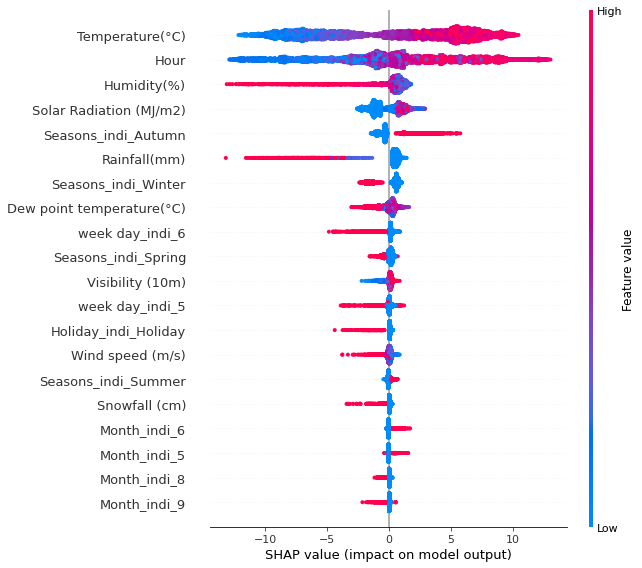

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns,title='Feature Importance with SHAP values')
plt.savefig('shap1.png')

**Summary:**

Our study kick start with understanding problem statement, Making prior hypothesis in basis of Domain Knowledge, Explored our past business information and gained insights about business, Users behaviour and User engagement with respect to weather pattern.

Essential data sorting and cleaning done on raw data, get rid off redundant features. Finally, processed data as model can understands Learns.

Then we use decision tree as benchmark and build Random Forest, XGBoost over the Baseline. GridserchCV and K-Fold cross validation helps us try Multiple parametric combination, to obtaion optimal parametre to our model.

Finally, XGBoost results good numbers with Tunned parametre. Got Train R2 score as 0.94 and R2_test_Score as 0.89.

Interpretation of major contributors..

Temprature, Humidity, Solar Radiation and Rainfall these are primal factor that affect/Boost user enagagement. 

Servise provider have to hold more bikes during


*   High Temprature days
*   Autumn Season

*   Moderate Humidity days
*   Days with no Railfalls


*   Day with moderate Solar Radiation







Thanks you..!